# Анализ бизнес-показателей развлекательного мобильного приложения Proctastinate Pro

## О чем проект

Маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Нужно разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- Лог сервера с данными об их посещениях,
- Выгрузка их покупок за этот период,
- Рекламные расходы.

**Цели исследования:**
1. Изучить откуда приходят пользователи и какими устройствами они пользуются
2. Рассчитать сколько стоит привлечение пользователей из различных рекламных каналов
3. Рассчитать сколько денег приносит каждый клиент
4. Узнать когда расходы на привлечение клиента окупаются
5. Определить факторы, которые мешают привлечению клиентов
6. Разработать рекомендации для выхода на окупаемость

**Этапы исследования:**

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ параметров 
4. Оценка бизнес-метрик
5. Оценка окупаемости рекламы
6. Подведение итогов исследования и разработка рекомендаций

## Обзор данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
#Откроем файл  с данными о посещениях 
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
#Откроем файл  с данными о покупках 
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv')
#Откроем файл  с данными о рекламных расходах 
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
display(visits.head())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

In [4]:
display(orders.head())

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Структура orders_info_short.csv:
-	User Id — уникальный идентификатор пользователя,
-	Event Dt — дата и время покупки,
-	Revenue — сумма заказа.

In [5]:
display(costs.head())

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Структура costs_info_short.csv:
-	dt — дата проведения рекламной кампании,
-	Channel — идентификатор рекламного источника,
-	costs — расходы на эту кампанию.

## Предобработка данных

In [6]:
#Приведем к нижнему регистру названия столбцов
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)

In [7]:
#Заменим названия столбцов, не имеющих нижнее подчеркивание
visits.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'}, inplace = True)
orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'}, inplace = True)

### Пропуски и дубликаты


In [8]:
#Определим есть ли пропуски в данных

data = [visits, orders, costs]

for i in data:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

In [9]:
#Посчитаем количество явных дубликатов
for i in data:
    print(i.duplicated().sum())

0
0
0


In [10]:
#Посмотрим какие есть уникальные значения в столбцах с типом данных object (помимо дат)
#Это нужно для исключения неявных дубликатов

print('Регионы пользователей', visits['region'].unique())
print('Устройства посещений', visits['device'].unique())
print('Каналы входа', visits['channel'].unique())
print('Оплаченные каналы', costs['channel'].unique())

Регионы пользователей ['United States' 'UK' 'France' 'Germany']
Устройства посещений ['iPhone' 'Mac' 'Android' 'PC']
Каналы входа ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
Оплаченные каналы ['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Приложением пользуются люди из четырех стран - США, Великобритания, Франция, Германия.

Пользователи используют для входа iPhone, Mac, Android, PC. 

Все 10 каналов входа, помимо органического, являются оплаченными: TipTop, RocketSuperAds, YRabbit, FaceBoom, MediaTornado, AdNonSense, LeapBob, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds.

Итак, мы убедились, что **пропусков, явных и неявных дубликатов в данных не имеется**.

### Изменение типов данных

In [11]:
# Преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

## Исследовательский анализ данных

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Зададим функции для расчета и анализа основных метрик из теоретическоуй части [курса "Аналитик данных буткемп" Яндекс.Практикум](https://practicum.yandex.ru/profile/data-analyst-bootcamp/):

Функции для вычисления значений метрик:
-	get_profiles() — для создания профилей пользователей,
-	get_retention() — для подсчёта Retention Rate,
-	get_conversion() — для подсчёта конверсии,
-	get_ltv() — для подсчёта LTV.


In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
        #if event in events['event_name'].unique():
            #profiles[event] = profiles['user_id'].isin(
                #events.query('event_name == @event')['user_id'].unique()
            #)

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функции визуализации

Функции для построения графиков:
-	filter_data() — для сглаживания данных,
-	plot_retention() — для построения графика Retention Rate,
-	plot_conversion() — для построения графика конверсии,
-	plot_ltv_roi — для визуализации LTV и ROI.

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Профили пользователей, момент и горизонт анализа

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [20]:
# получаем профили пользователей используя функцию
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Проверим минимальную и максимальную даты привлечения пользователей.

In [21]:
print(profiles['first_ts'].min())
print(profiles['first_ts'].max())

2019-05-01 00:00:41
2019-10-27 23:59:04


Максимальная и минимальные даты привлечения соответствуют указанному в задании, период данных для анализа определен корректно - с 1 мая по 27 октября 2019 года.

Установим момент и горизонт анализа данных. Предположим дату анализа 27 октября 2019 года и зададим двухнедельный горизонт.

In [22]:
observation_date = datetime(2019, 10, 27).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Пользователи по странам

Ранее мы уже выяснили, что приложением пользуются люди из четырех стран - США, Великобритания, Франция, Германия. Посчитаем на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [42]:
region_profiles = profiles.groupby('region').\
                  agg({'user_id':'nunique','payer':'sum'}).\
                  reset_index()

region_profiles['payers_percent'] = region_profiles['payer']/region_profiles['user_id']*100

region_profiles.sort_values(by='payers_percent', ascending=False)

region  user_id  payer  payers_percent
3  United States   100002   6902        6.901862
1        Germany    14981    616        4.111875
2             UK    17575    700        3.982930
0         France    17450    663        3.799427

Большинство пользователей мобильным приложением приходится на США, количество пользователей из остальных стран распределилось примерно поровну. Самая большая доля платящих пользователей также приходится на США - около 7%. В Германии, Великобритании и Франции доля платящих варьируется о 3 % до 4%.

### Пользователи и их устройства

Изучим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [44]:
device_profiles = profiles.groupby('device').\
                  agg({'user_id':'nunique','payer':'sum'}).\
                  reset_index()

device_profiles['payers_percent'] = region_profiles['payer']/region_profiles['user_id']*100

device_profiles.sort_values(by='payers_percent', ascending=False)

device  user_id  payer  payers_percent
3   iPhone    54479   3382        6.901862
1      Mac    30042   1912        4.111875
2       PC    30455   1537        3.982930
0  Android    35032   2050        3.799427

Пользователи чаще всего пользуются IPhone, на втором месте Android. Примерно поровну пользователей заходит с PC и Mac. Наибольшая доля платящих пользователей у IPhone (около 7%). У остальных устройств доля платящих пользователей составляет 3-4%. 

### Каналы привлечения 

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [41]:
channel_profiles = profiles.groupby('channel').\
                  agg({'user_id':'nunique','payer':'sum'}).\
                  sort_values(by='payer', ascending=False).reset_index()

channel_profiles['payers_percent'] = channel_profiles['payer']/region_profiles['user_id']*100

channel_profiles.sort_values(by='payers_percent', ascending=False)

channel  user_id  payer  payers_percent
0             FaceBoom    29144   3557       12.204914
4           AdNonSense     3880    440       11.340206
8       lambdaMediaAds     2149    225       10.469986
1               TipTop    19561   1878        9.600736
5       RocketSuperAds     4448    352        7.913669
3       WahooNetBanner     8553    453        5.296387
9              YRabbit     4312    165        3.826531
10        MediaTornado     4364    156        3.574702
6              LeapBob     8553    262        3.063253
7   OppleCreativeMedia     8605    233        2.707728
2              organic    56439   1160        2.055316

Органически набранная аудитория составляет наибольшую долю пользователей. Далее по набору пользователей выделяется FaceBoom и TipTop. Больше всего платящих пользователей пришли через FaceBoom (12%), AdNonSense (11%), lambdaMediaAds	(10%).

### Промежуточные итоги по разделу

Теперь мы имеем датасет с профилями уникальных пользователей мобильного приложения.

Максимальная и минимальные даты привлечения определены с 1 мая по 27 октября 2019 года.

Установлен момент анализа данных - 27 октября 2019 г., задан двухнедельный горизонт.

Инсайты по анализу профилей пользователей:

- **Большинство пользователей приложения приходится на США** (100 002), количество пользователей из остальных стран распределилось примерно поровну. **Самая большая доля платящих пользователей также приходится на США** - около 7%. В Германии, Великобритании и Франции доля платящих варьируется от 3 % до 4%. 

- **Пользователи чаще пользуются мобильными устройствами**, чаще всего это IPhone, на втором месте Android. Примерно поровну пользователей заходит с PC и Mac. Наибольшая доля платящих пользователей у IPhone (около 7%). У остальных устройств доля платящих пользователей составляет 3-4%.

- **Органически набранная аудитория составляет наибольшую долю пользователей (56 439). Далее по набору пользователей выделяется FaceBoom (29 144) и TipTop (19 561)**. Больше всего платящих пользователей пришли через FaceBoom (12%), AdNonSense (11%), lambdaMediaAds (10%). Худшие рекламные каналы по доле платящих пользователей: LeapBob, OppleCreativeMedia, Organic (2-3%).

## Маркетинг


### Общие расходы на маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [45]:
round(costs['costs'].sum())

105497

Расходы на маркетинг составили 105497 долларов.

### Расходы по реламным каналам

Выясним, как траты распределены по рекламным источникам.

In [46]:
channel_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
channel_costs

channel     costs
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

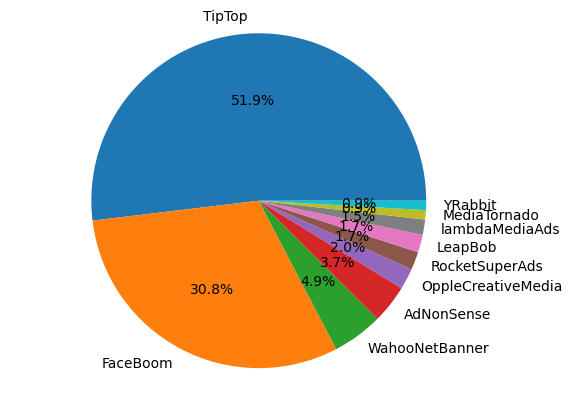

In [47]:
# Визуализируем распределение бюджета по рекламным каналам
vals = channel_costs['costs']
labels = channel_costs['channel']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")
autopct = True

Кажется, маркетологи вложили бюджет неравномерно. Более половины рекламных расходов приходится на TipTop (52%), около трети - на FaceBoom (31%). Остальные каналы суммарно занимают около 17%.

### Динамика расходов

Посмотрим на динамику изменения расходов во времени.

In [48]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.groupby('month').agg({'costs':'sum'}).reset_index()

month      costs
0      5   9978.570
1      6  15090.045
2      7  16447.060
3      8  20657.870
4      9  22441.340
5     10  20882.415

Судя по таблице, с начала исследуемого периода затраты на маркетинг постоянно росли до сентября включительно, а в октябре немного снизились. Суммарно в октябре траты вдвое превышают бюджет на май. Посмотрим на динамику в графике. 

Text(0.5, 0, 'Дата')

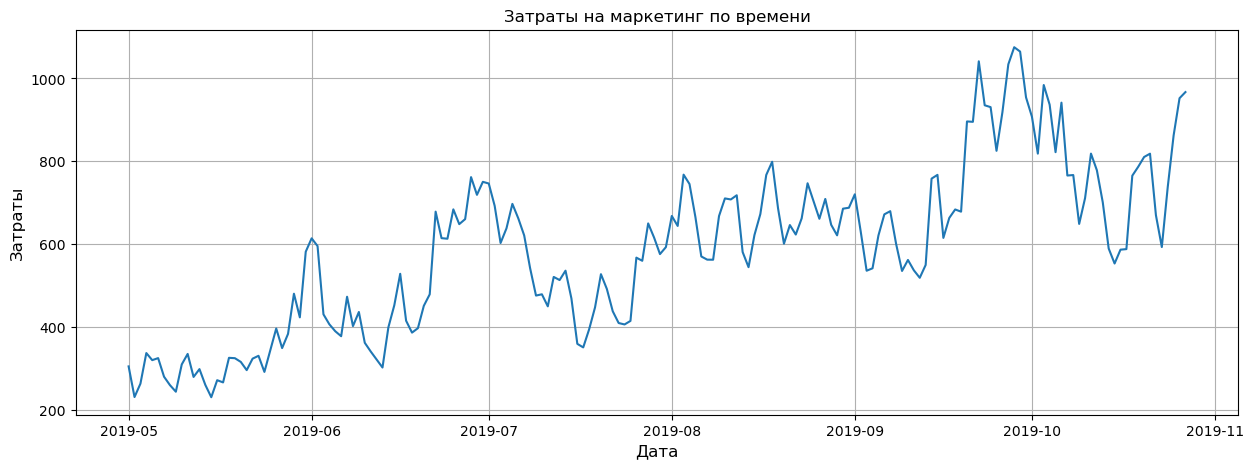

In [49]:
plt.figure(figsize=(15,5)) 
data = costs.pivot_table(index= 'dt', values = 'costs', aggfunc = 'sum')
sns.lineplot(data=data, x='dt', y='costs')
plt.grid(True)
plt.title('Затраты на маркетинг по времени', size=12)
plt.ylabel('Затраты', size=12)
plt.xlabel('Дата', size=12)

График показывает, c начала мая до конца октября затраты на маркетинг выросли почти в  4 раза.

Чтобы проверить на что уходил бюджет, нужно посмотреть на график истории изменений затрат по каналам привлечения.

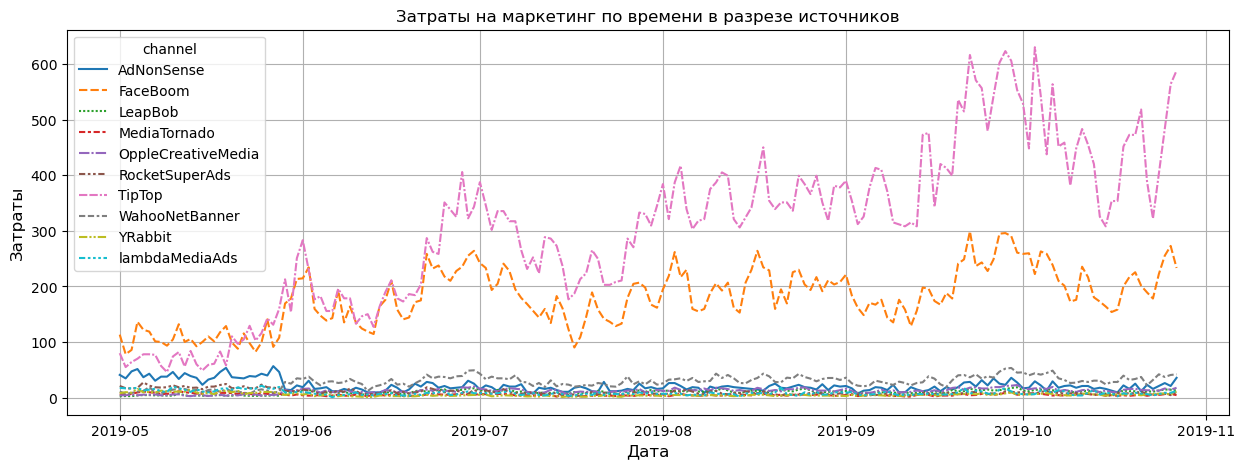

In [50]:
plt.figure(figsize=(15,5)) 
data1 = costs.pivot_table(index= 'dt', columns= 'channel', values = 'costs', aggfunc = 'sum')

sns.lineplot(data=data1)
plt.grid(True)
plt.title('Затраты на маркетинг по времени в разрезе источников', size=12)
plt.ylabel('Затраты', size=12)
plt.xlabel('Дата', size=12);

Оказывается, на рост затрат влияли только вложения в каналы TipTop и FaceBoom. Остальные каналы оставались на стабильно одинаковом уровне вложений на протяжении всего исследуемого периода.

### Затраты на привлечение пользователя

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.

Для оценки среднего значения исключим органических пользователей, т.к. у них CAC равен нулю.

In [51]:
profiles_no_organic = profiles.query('channel != "organic"')
print('Средний CAC: {:.2f}'.format(profiles_no_organic['acquisition_cost'].mean()))

Средний CAC: 1.13


Рассчитаем средний CAC по каждому каналу привлечения.

In [52]:
round((profiles_no_organic.groupby('channel')\
.agg({'acquisition_cost':'mean'})\
.rename(columns={'acquisition_cost':'mean_cac'})\
.sort_values(by='mean_cac', ascending=False)\
.reset_index()),2)

channel  mean_cac
0              TipTop      2.80
1            FaceBoom      1.11
2          AdNonSense      1.01
3      lambdaMediaAds      0.72
4      WahooNetBanner      0.60
5      RocketSuperAds      0.41
6  OppleCreativeMedia      0.25
7             YRabbit      0.22
8        MediaTornado      0.22
9             LeapBob      0.21

TipTop является самым дорогим каналом привлечения пользователей - CAC в среднем 2.80 на одного пользователя. Этот канал обходится как минимум в 2.5 раза дороже остальных. 

### Промежуточные итоги по разделу

Расходы на маркетинг составили 105497 долларов.

Распределение бюджета по каналам ведется неравномерно. Более половины рекламных расходов приходится на TipTop (52%), около трети - на FaceBoom (31%). Остальные каналы суммарно занимают около 17%.

С начала исследуемого периода затраты на маркетинг постоянно росли до сентября включительно, а в октябре немного снизились. Суммарно в октябре траты вдвое превышают бюджет на май. С начала мая до конца октября затраты на маркетинг выросли почти в  4 раза. 

При этом на рост затрат влияли только вложения в каналы TipTop и FaceBoom. Остальные каналы оставались на стабильно одинаковом уровне вложений на протяжении всего исследуемого периода.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Представим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

### Общая окупаемость

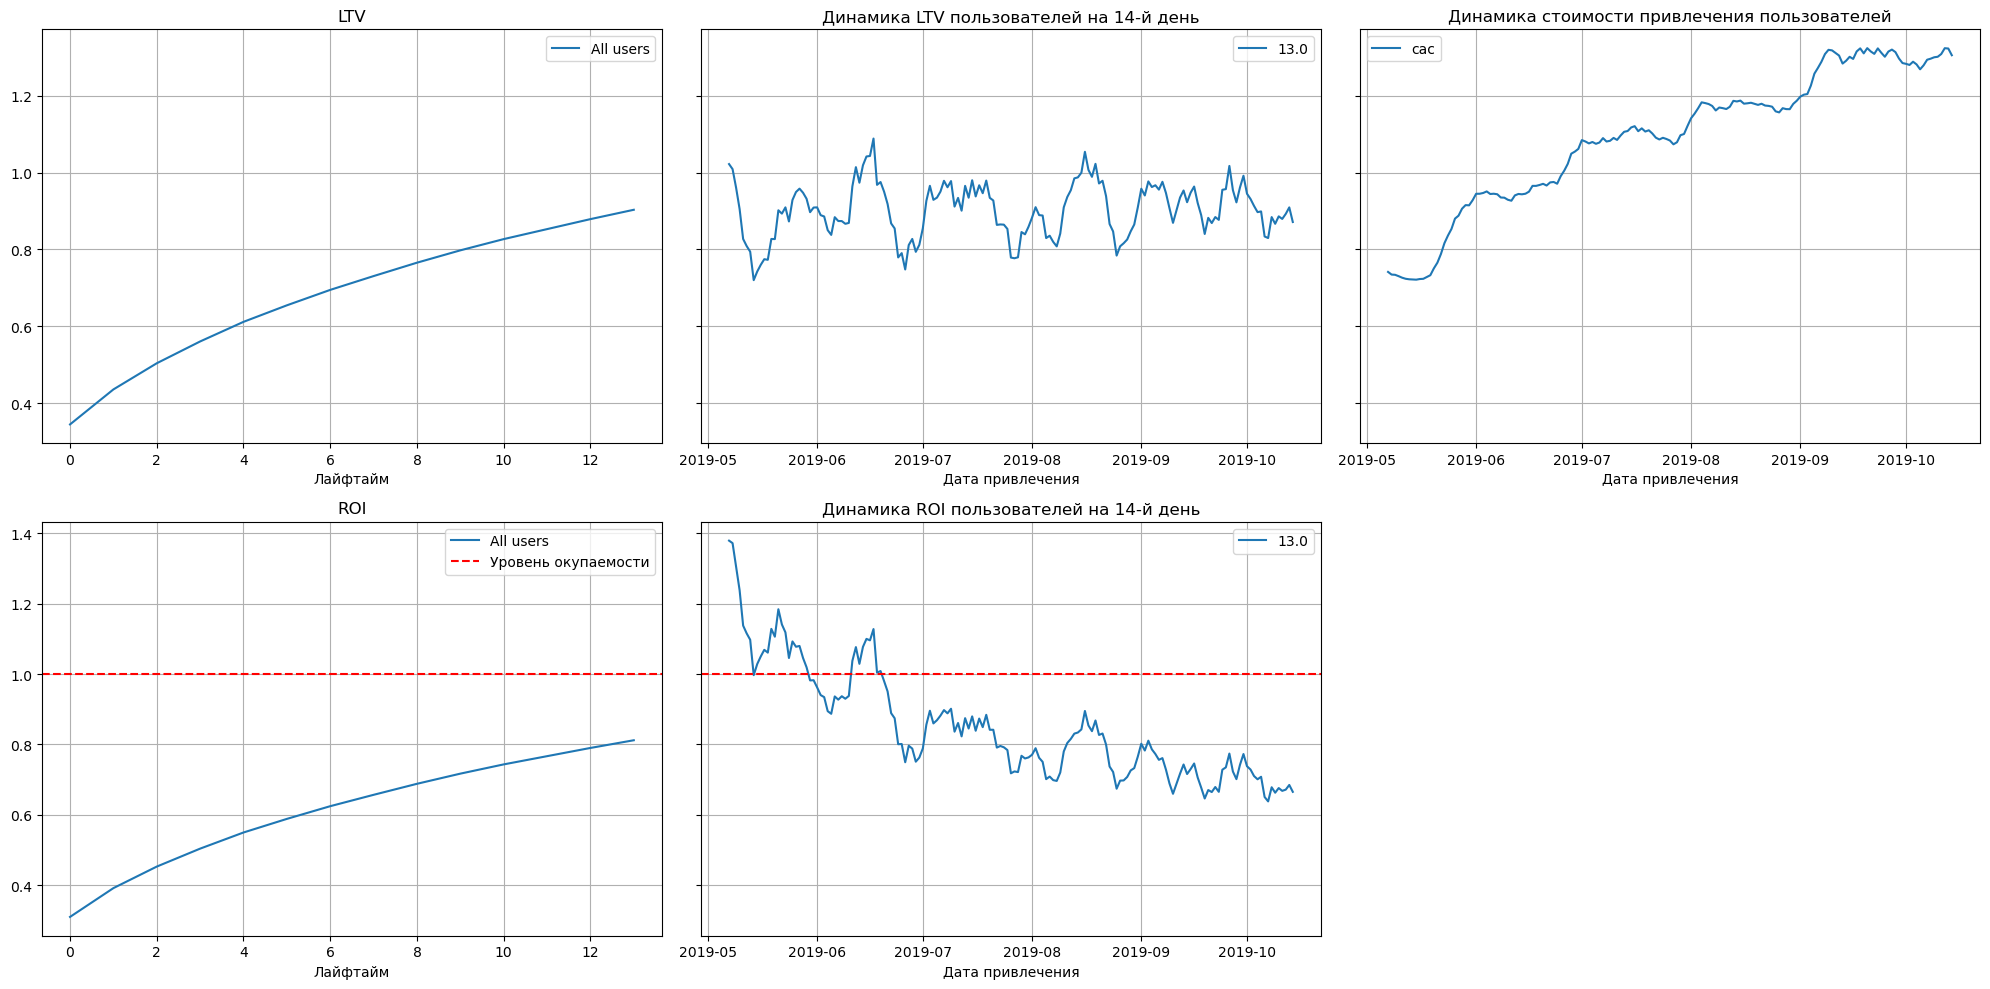

In [53]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:
- Реклама не окупается. ROI к концу двухнедельного периода не доходит до линии окупаемости. В динамике ROI впервые за исследуемый период упал за линию окупаемости в конце июня 2019 г., а с конца августа уже больше не поднимался в "плюс", продолжая снижаться до конца октября 2019 г.
- LTV  достаточно стабилен, в динамике имеет циклично повторяющиеся пики и падения. Значит, дело не в ухудшении качества пользователей.
- CAC с мая по октябрь более чем в 2 раза - клиенты для компании обходятся все дороже из месяца в месяц. 

Чтобы разобраться в причинах проблем, проанализируем как обстоит ситуация с конверсией и удержанием, а также с окупаемостью в разрезе доступных параметров — стране, каналу и устройству первого посещения.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   ROI падает, так как растет привлечение

</div>


### Конверсия и удержание пользователей

Проверим конверсию и удержание пользователей и динамику их изменения.

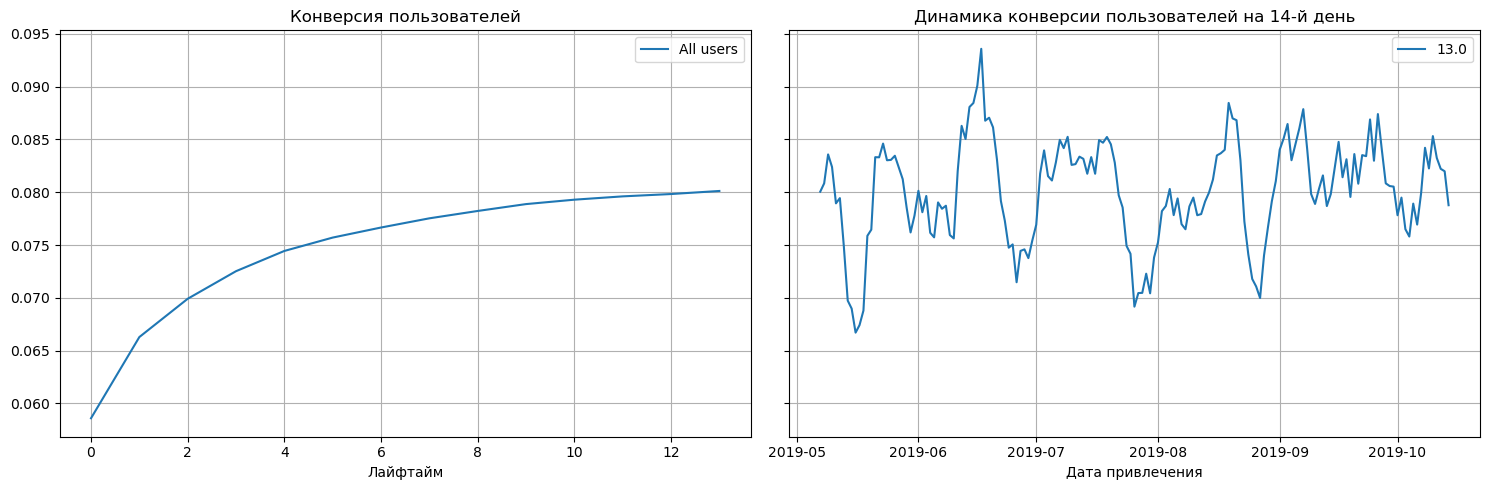

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

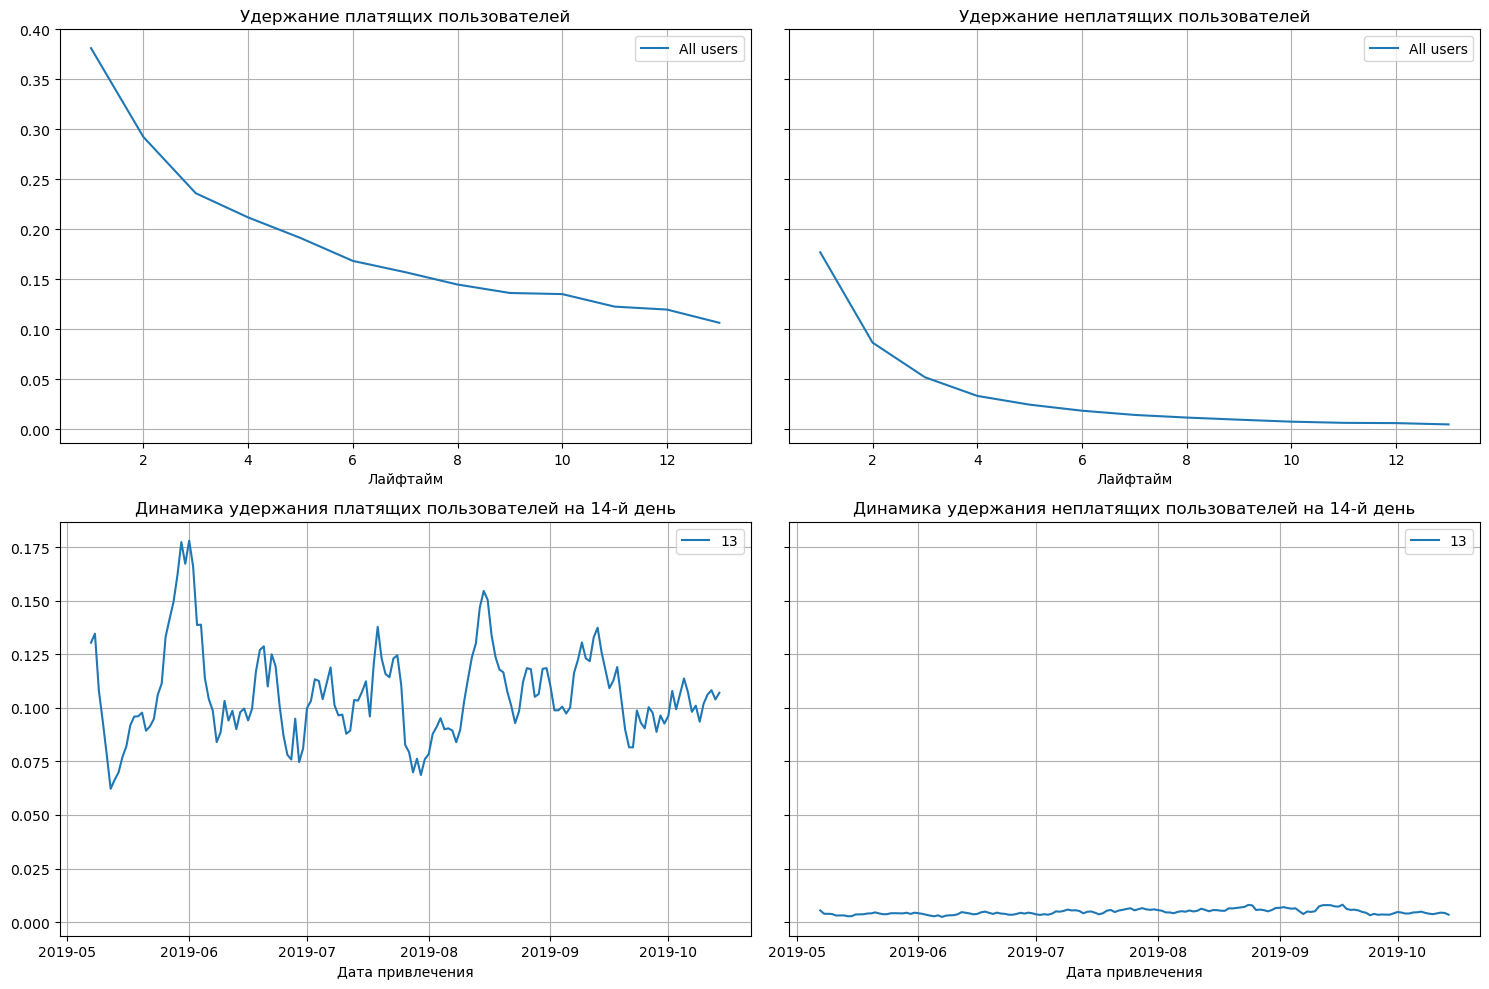

In [56]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия имеет стабильный характер, а удержание сильно "хромает" среди неплатящих пользователей 

### Метрики в разрезе устройств

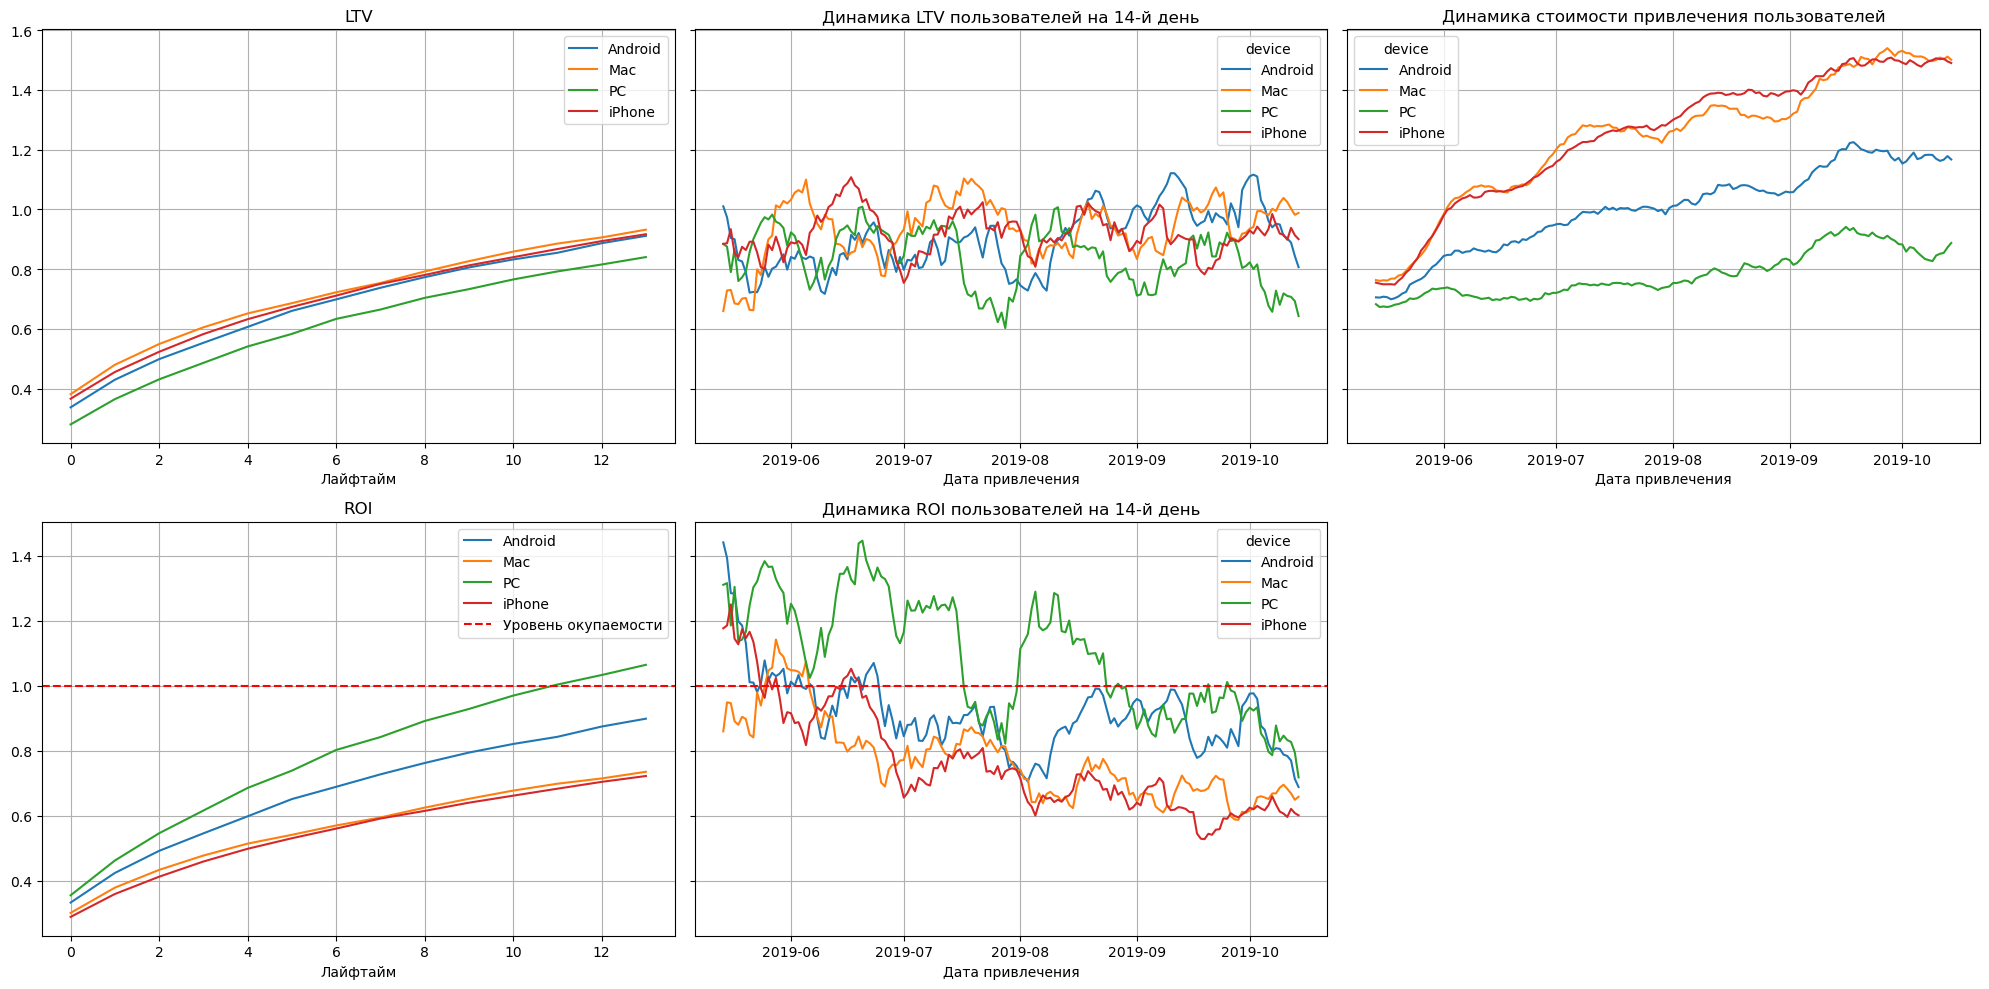

In [57]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

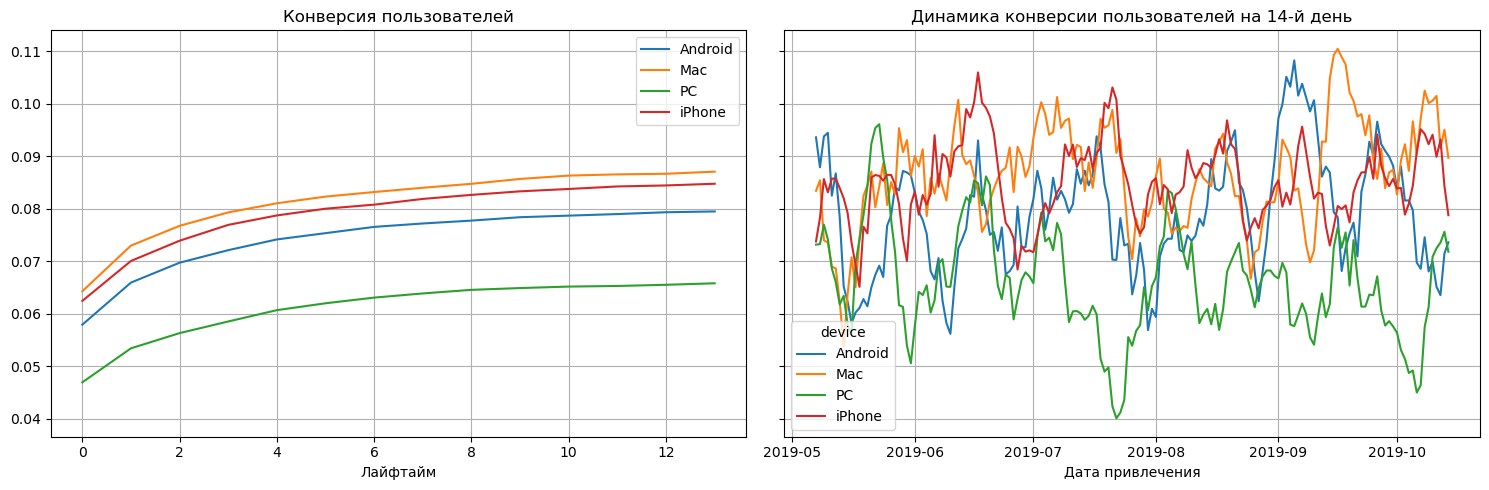

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

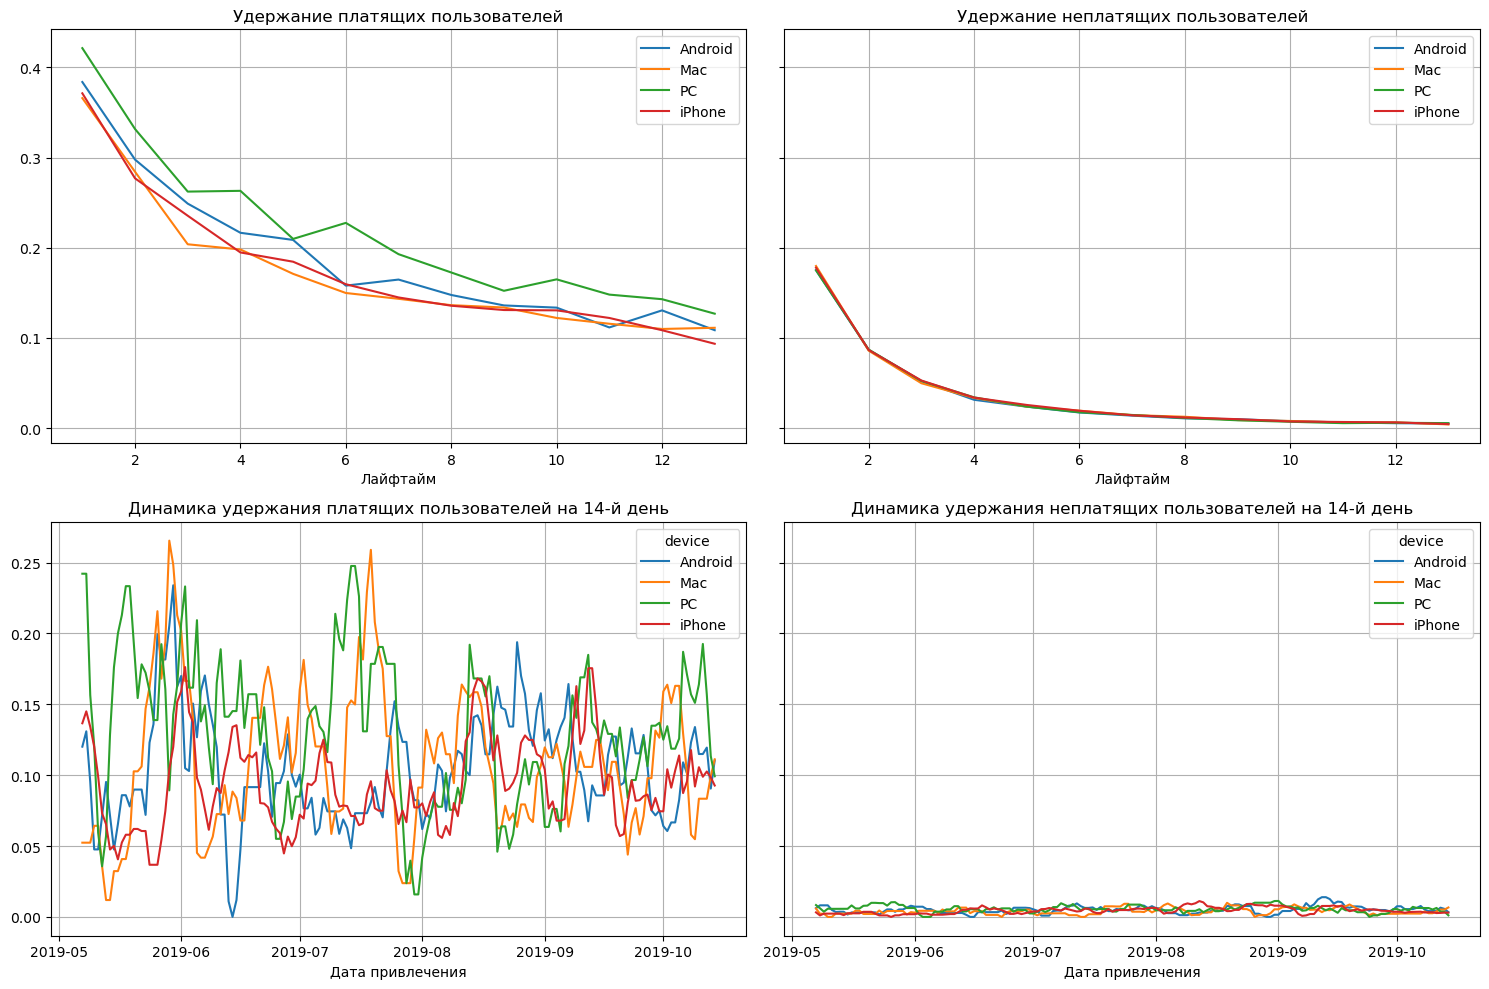

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Заметна высокая стоимость привлечения среди клиентов, исполльзующих MAC и IPhone, которая продолжает расти.
При этом затраты на рекламу среди этих пользователей не окупается на протяжении всего двухнедельного периода. Динамика ROI на 14-ый день падает у всех клиентов, но среди клиентов с MAC и IPhone снижение более сильное. 
Но конверсия для пользователей устройств MAC и IPhone немного выше, чем у других.
Удержание для всех устройств примерно одинаковое.

**Нужно пересмотреть затраты на привлечение владельцев MAC и IPhone.**

### Метрики в разрезе стран

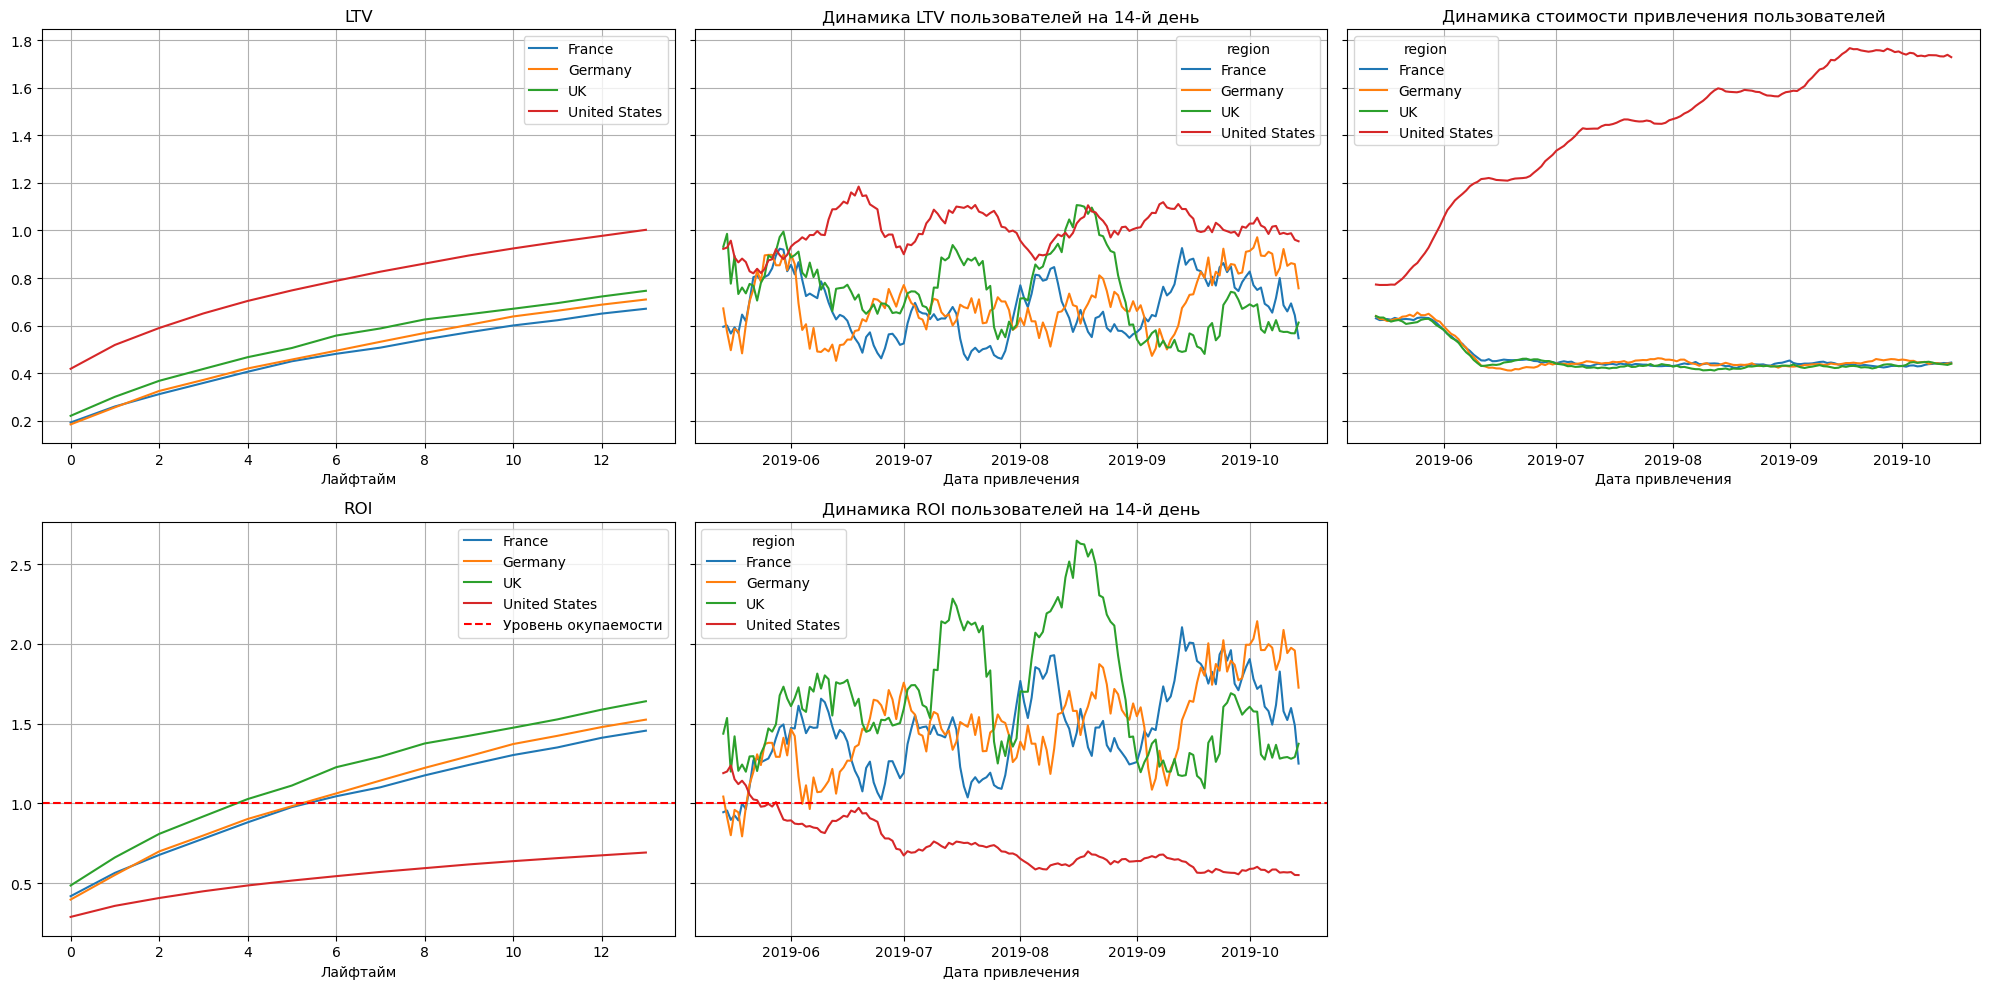

In [60]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

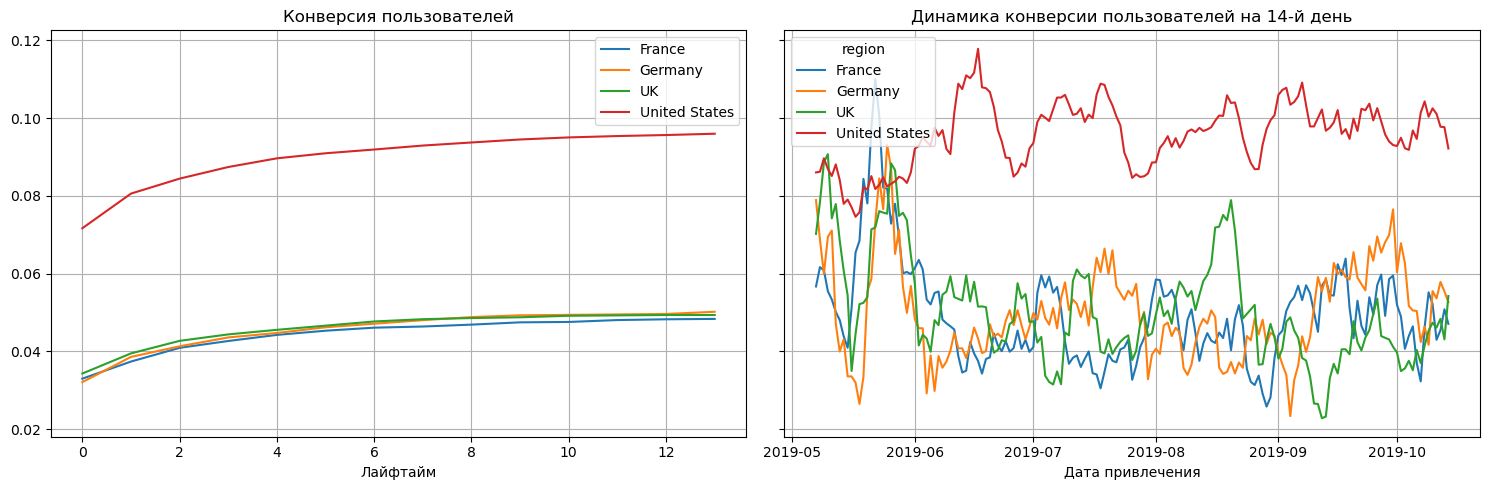

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

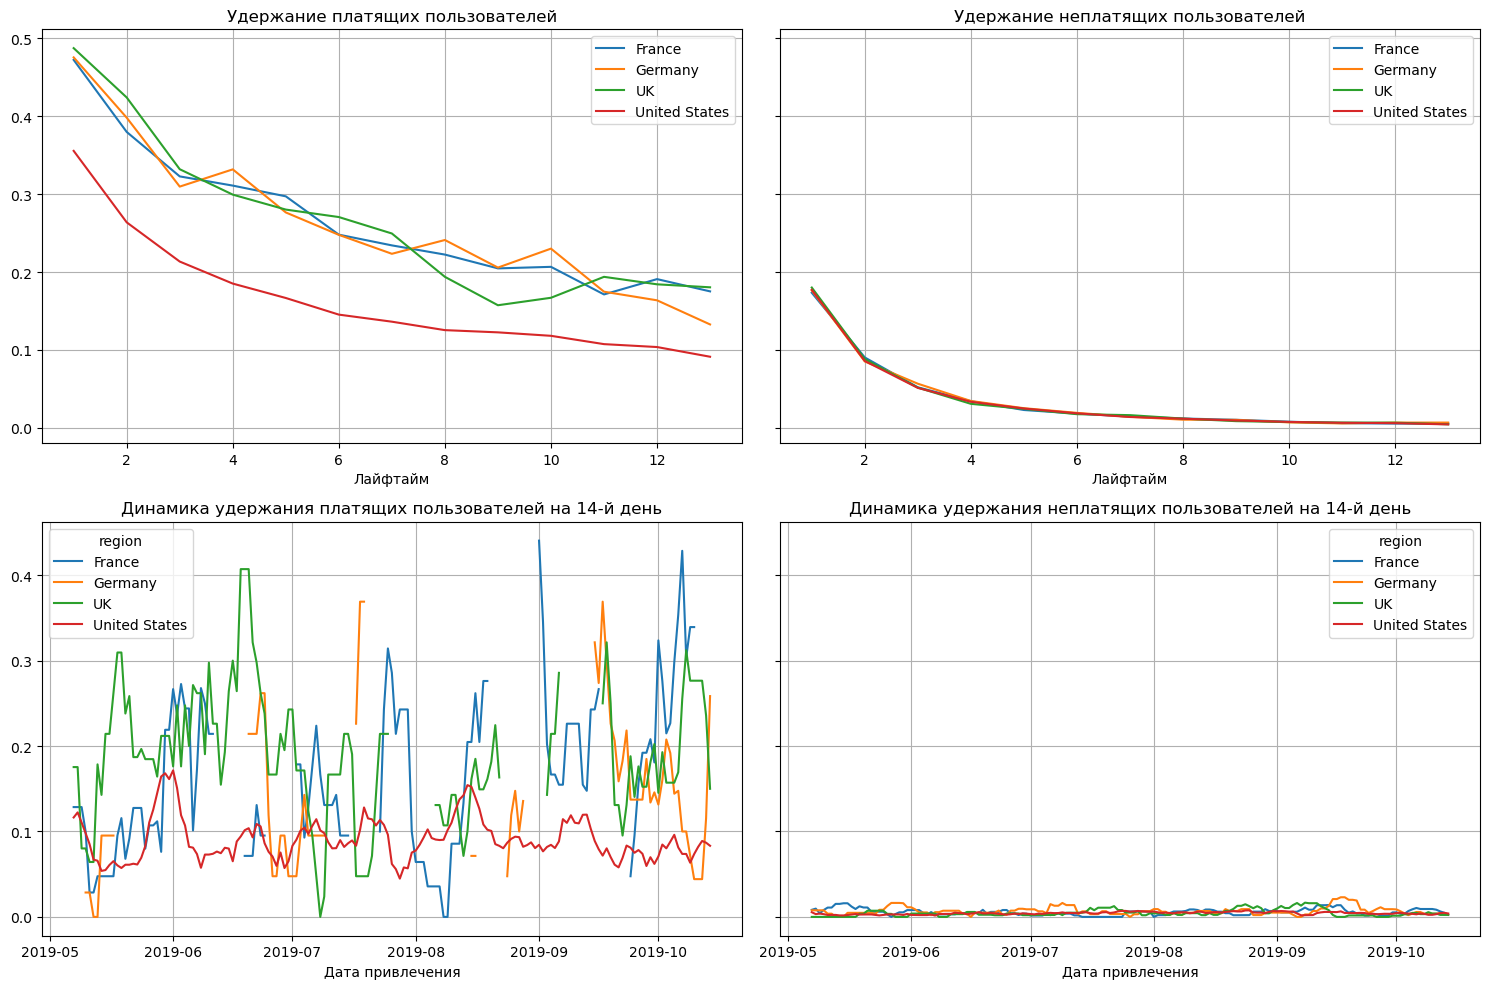

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Среди всех стран метрики выбиваются сильнее всего у США - реклама там не окупается и имеет тренд к снижению окупаемости в динамике. Стоимость привлечения клиентов из США сильно выше, чем у других стран, и растет в динамике.
Конверсия у США высокая, а удержание хуже остальных. 

У Франции, Великобритании и Германии показатели стабильны, ROI выходит на окупаемость со 2-4 дня, стоимость привлечения практически идентична и не меняется во времени.

**Нужно улучшить показатели удерживания клиентов из США и оптимизировать затраты на их привлечение. Напомним, что более 60% пользователей приложения приходится именно на США, и доля платящих пользователей здесь была больше всех.**

### Метрики в разрезе каналов

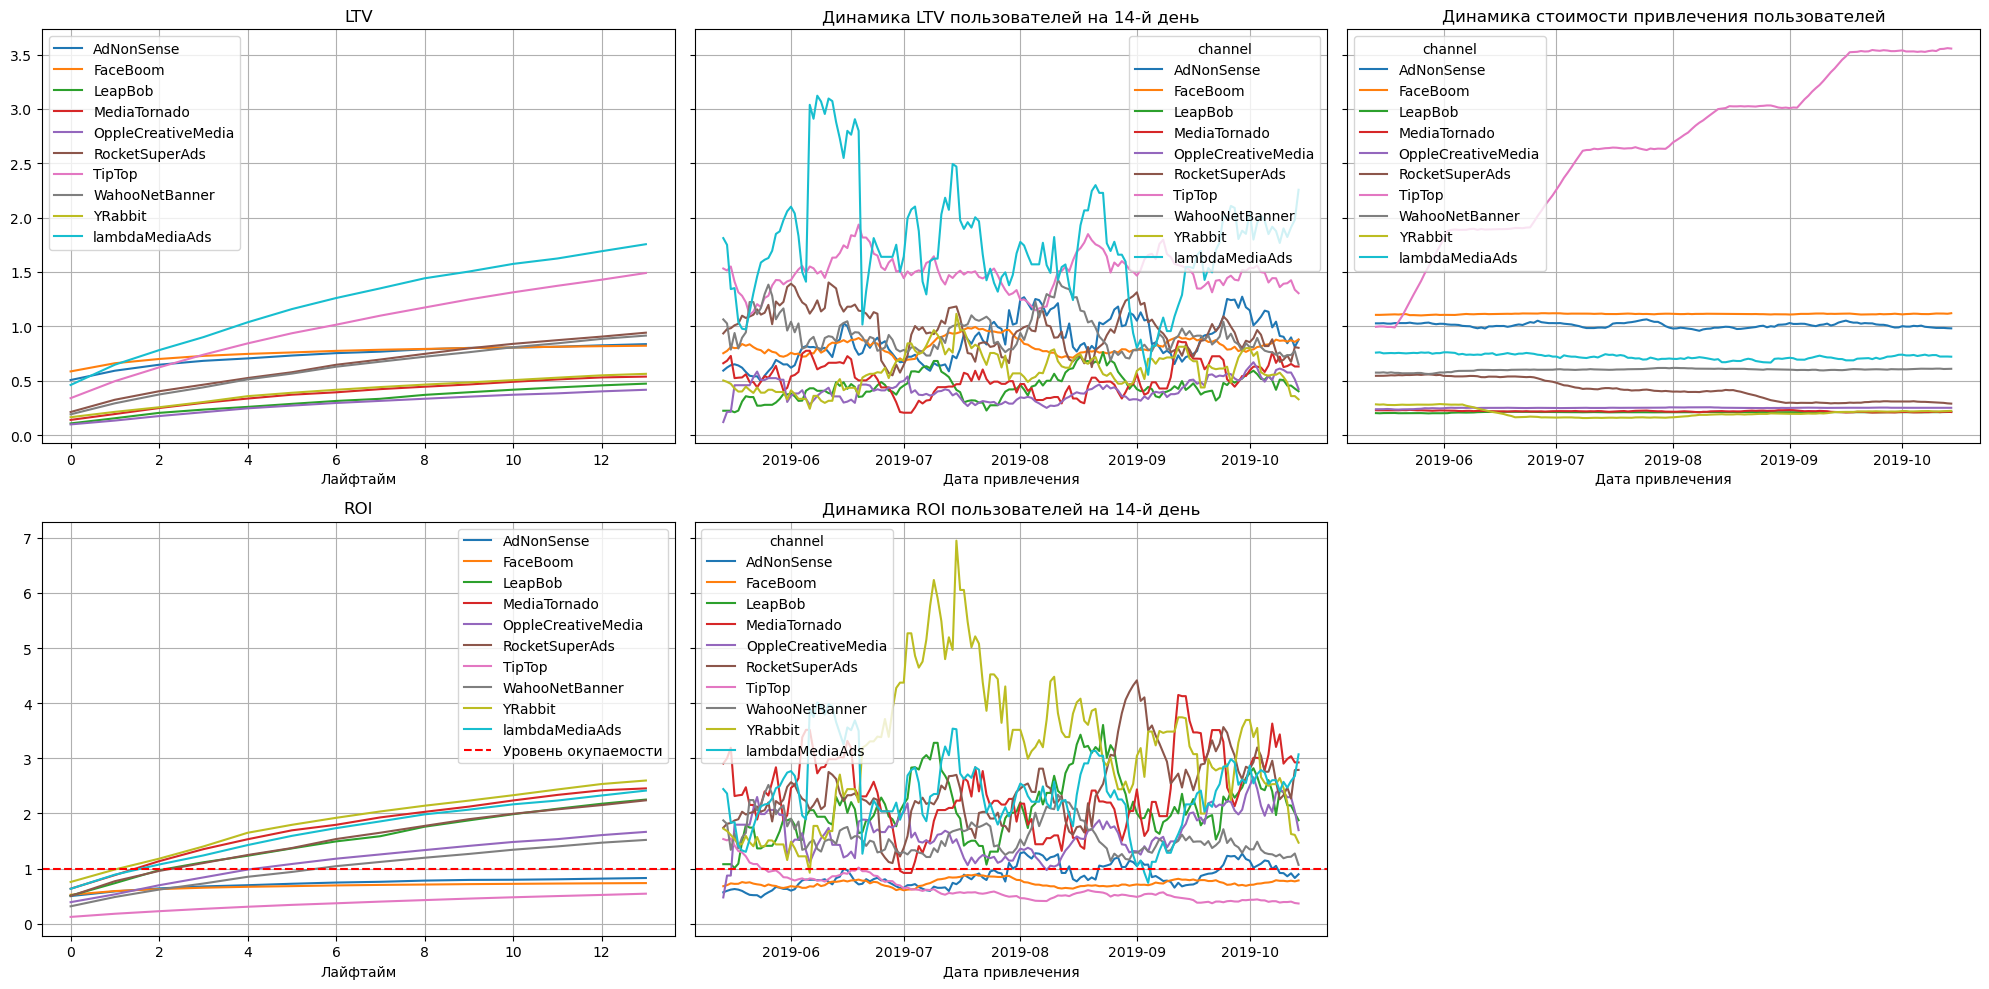

In [63]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

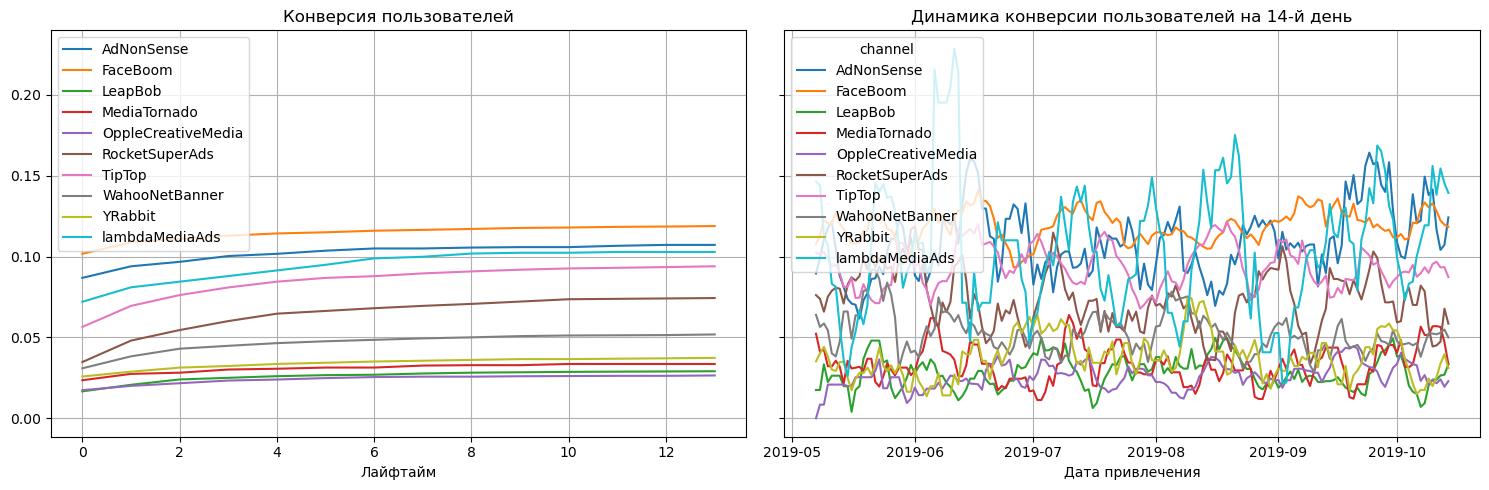

In [64]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

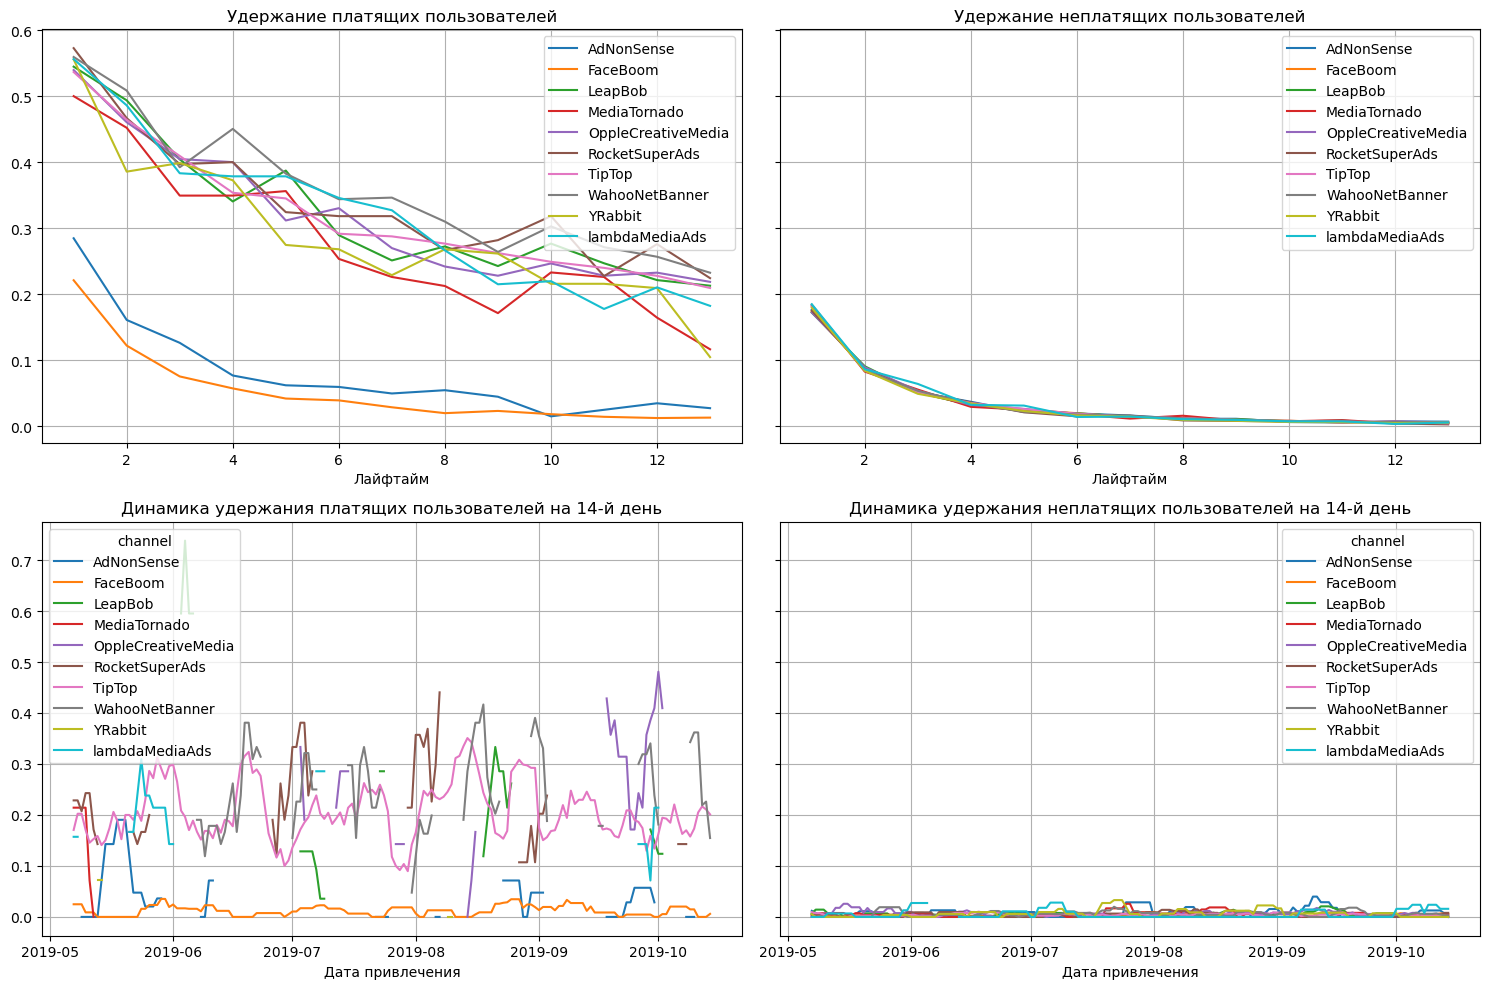

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не окупается реклама в каналах TipTop, AdNonSense, FaceBoom. Сильно выбивается стоимость привлечения пользователей в TipTop, затраты на рекламу на этой платформе растут несоразмерно остальным каналам. Кажется в компании было решено вложить бюджет на продвижение в этой платформе, но реклама там неэффективна.

Перспективные каналы по окупаемости: YRabbit, MediaTornado, IamdaMediaAds. 

При этом конверсия в FaceBoom довольно высокая, а удержание крайне низкое.

**Нужно пересмотреть рекламные затраты в пользу более эффективных платформ**.

### Анализ ситуации в США

В США с продвижением нашего мобильного приложения дела особенно плохи, несмотря на то, что это основная аудитория продукта. Поэтому стоит прицельно взглянуть на метрики отдельно в этой стране.

**Гипотеза № 1.** Дело в устройствах. Отдельно в США могут быть проблемы со входом или использованием с какого-то конкретного вида устройства. Например, если в версии приложения для IPhone плохо настроена программа нахождения локации, не настроена форма оплаты со счетов национальных банков. 

**Гипотеза № 2.** Дело в каналах продвижения. Возможно пользователи США плохо привлекаются и удерживаются из-за неэффективной рекламы в выбранных каналах. Например, если бюджет вложен в непопулярные в США платформы.

In [74]:
#оставим профили пользователей только из США
usa_profiles = profiles_no_organic.query('region == "United States"')

array(['United States'], dtype=object)

####  Метрики в разрезе устройств

Проверяем Гипотезу №1 - посмотрим есть ли проблемы в пользовании приложением отдельными устройствами.

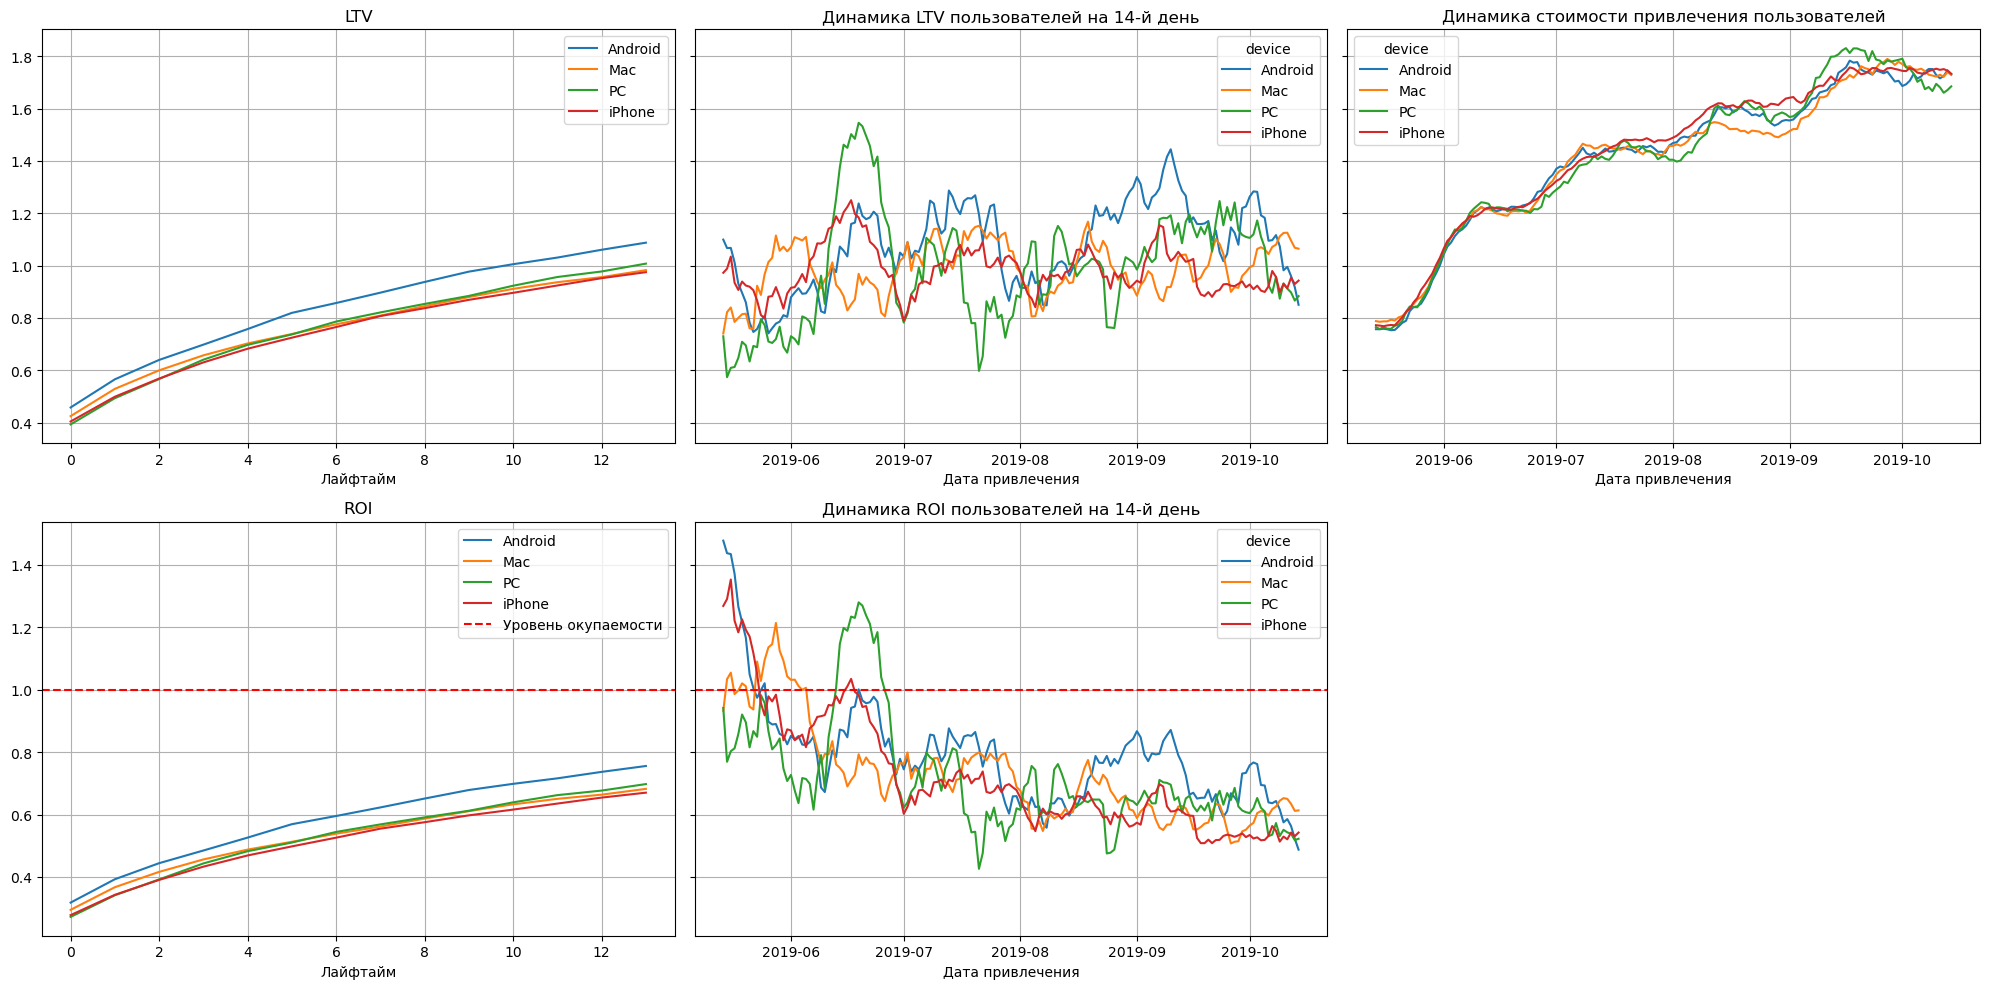

In [79]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

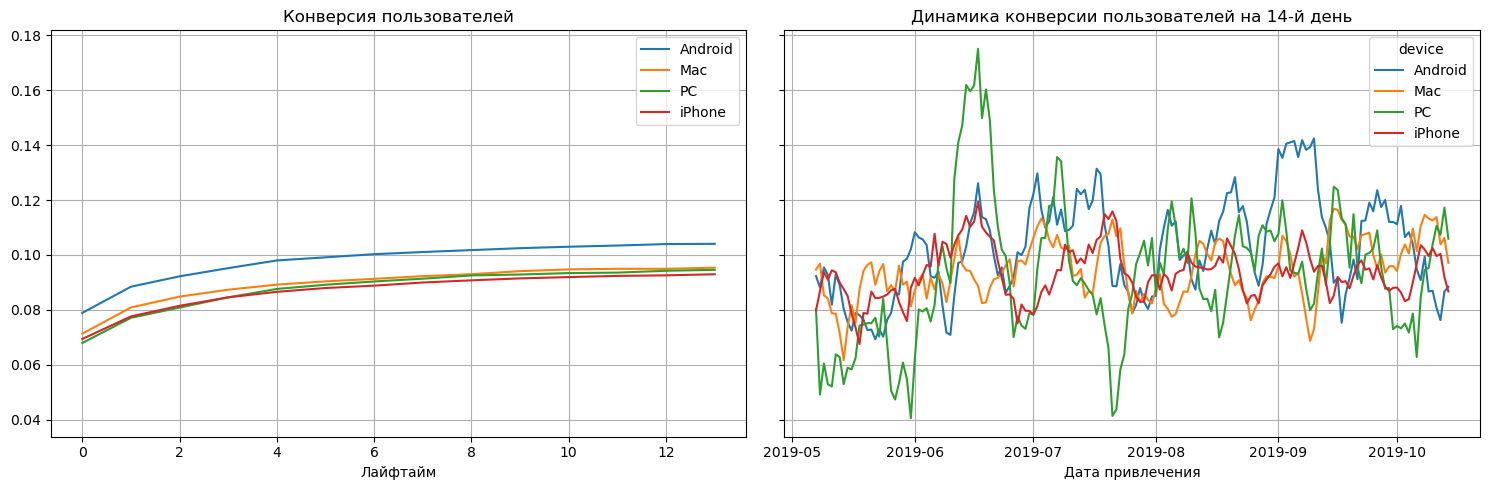

In [80]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

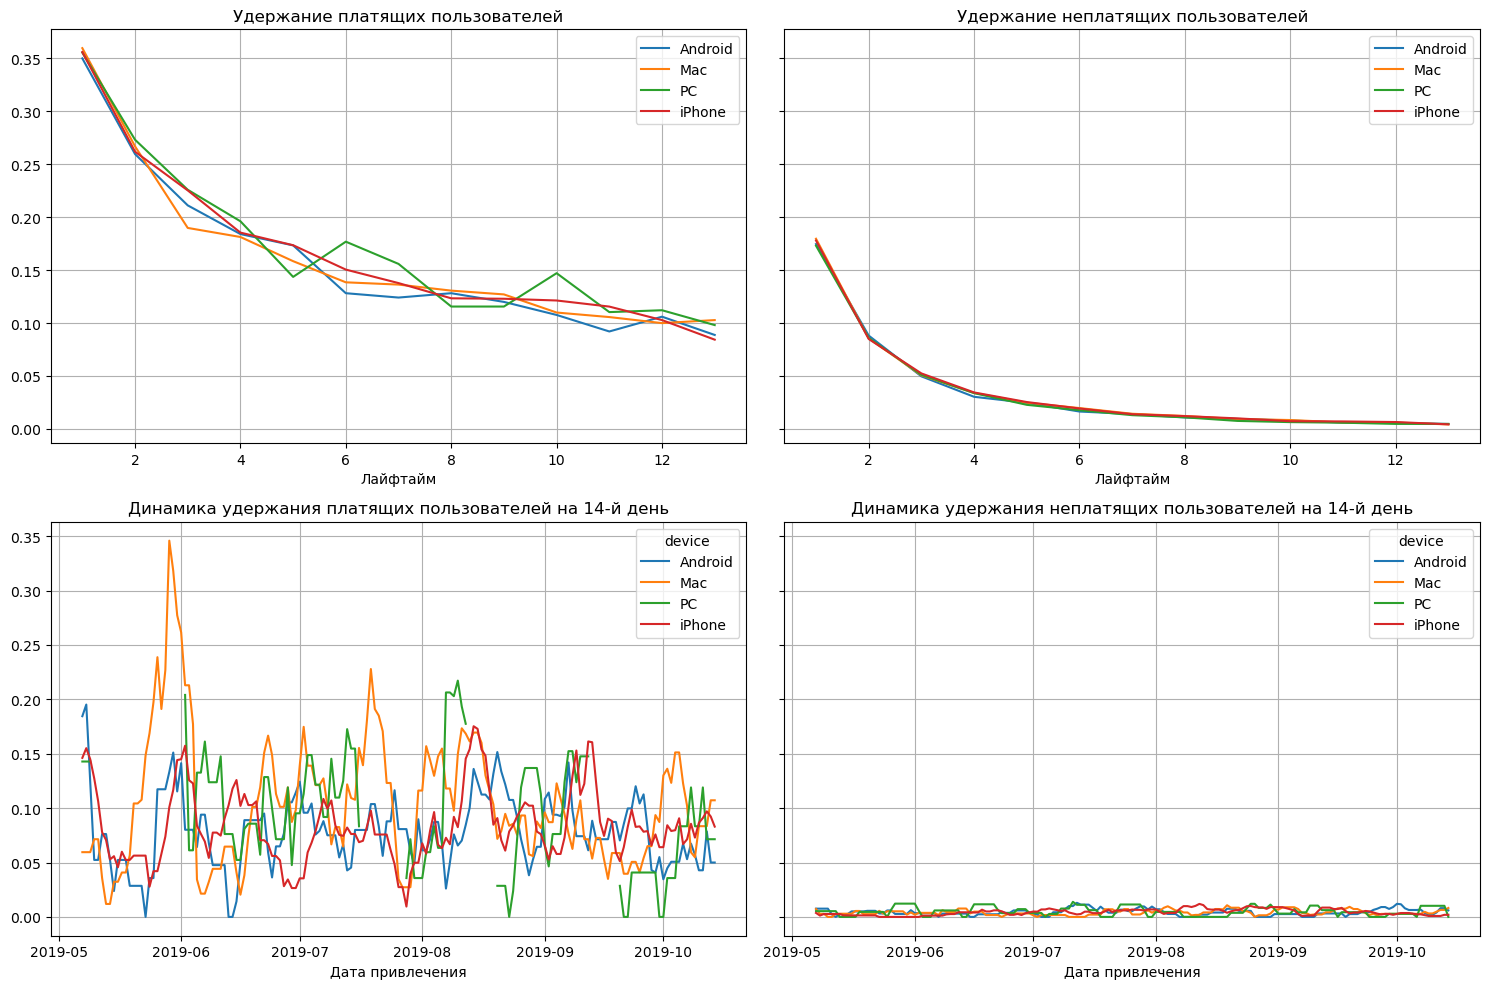

In [81]:
retention_raw, retention_grouped, retention_history = get_retention(
    usa_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Особо выделяющихся проблем не выявлено, проблемы с окупаемостью, удержанием и конверсией есть одинаково во всех устройствах.  Поэтому **Гипотезу №1 отвергаем - дело не в устройствах**.

Но сделаем для себя заметку, что в США окупаемость и конверсия пользователей с Android чуть лучше, чем у пользователей с другими устройствами. Но все равно ни одно устройство само по себе не обеспечивает выход на окупаемость. Напомним, что в общем анализе метрик в разрезе устройств эти показатели были блучше у IPhone и Mac. 

#### Метрики в разрезе каналов

Проверяем Гипотезу №2 - посмотрим есть ли проблемы в каналах привлечения пользователей.

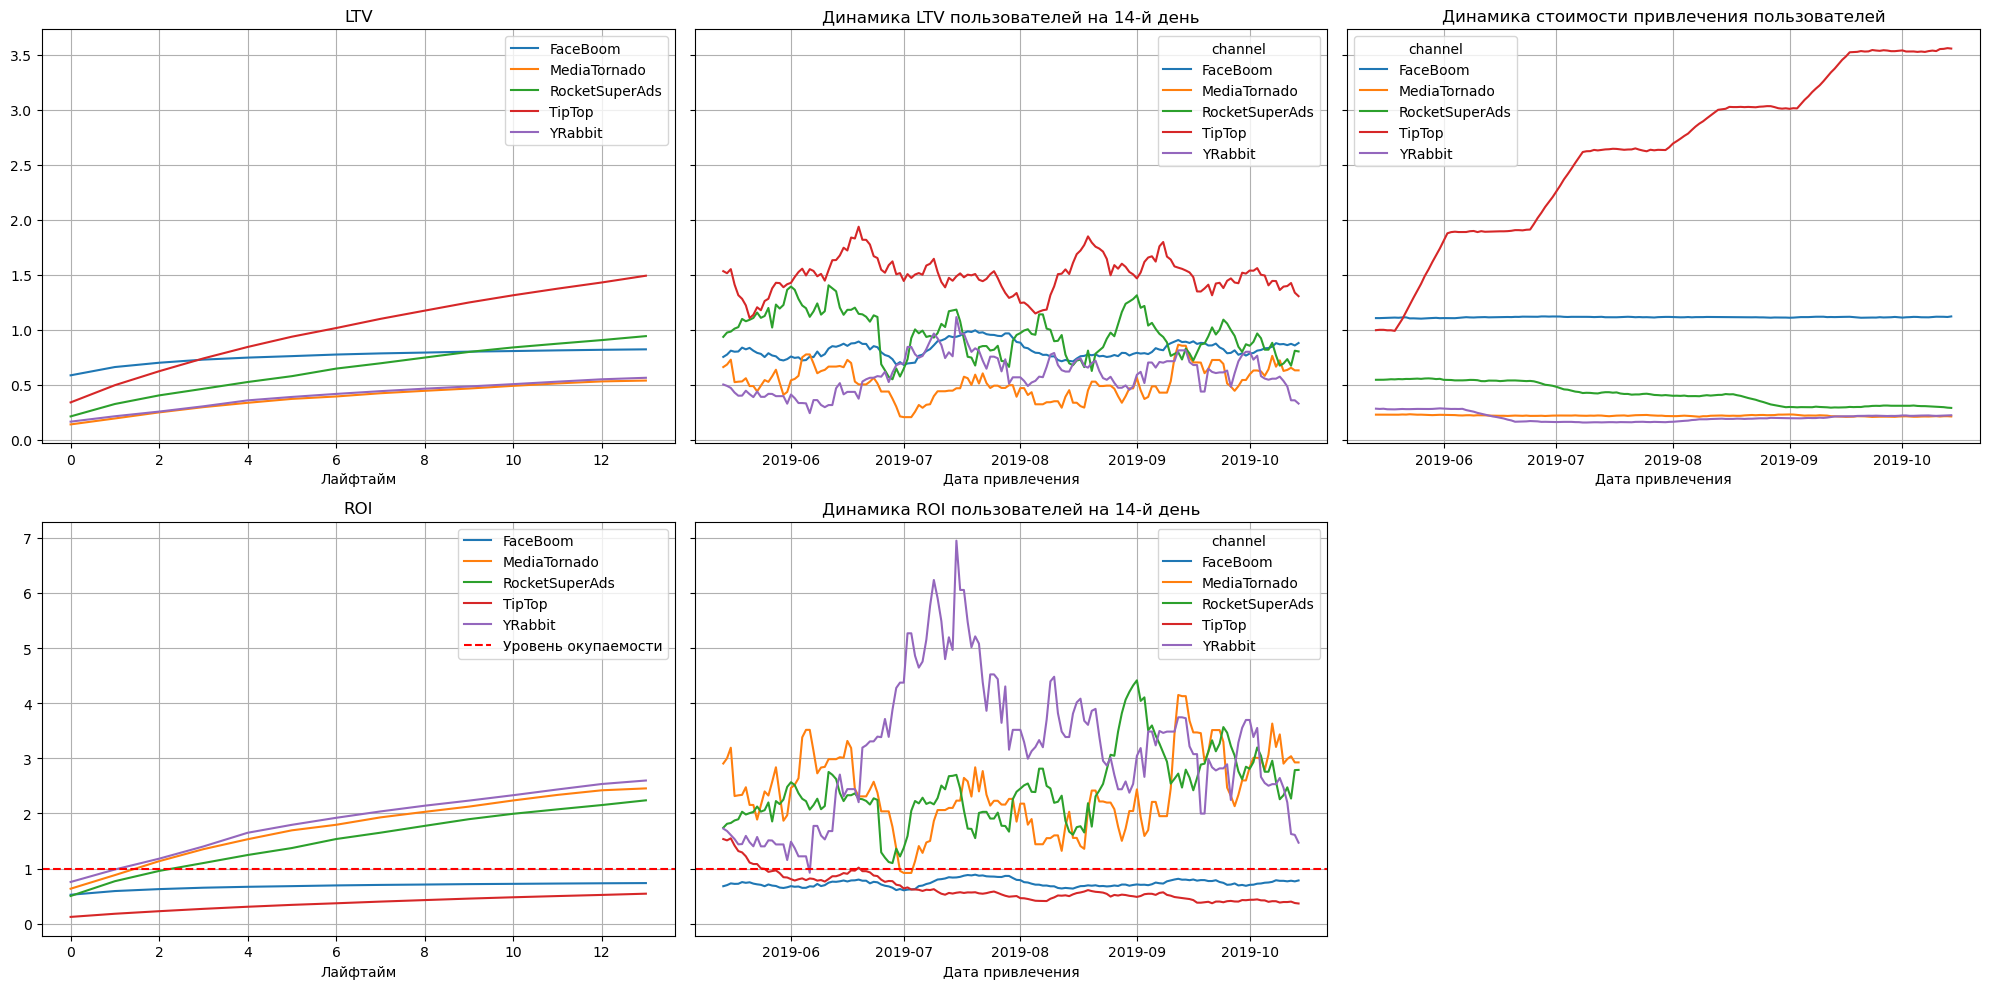

In [83]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

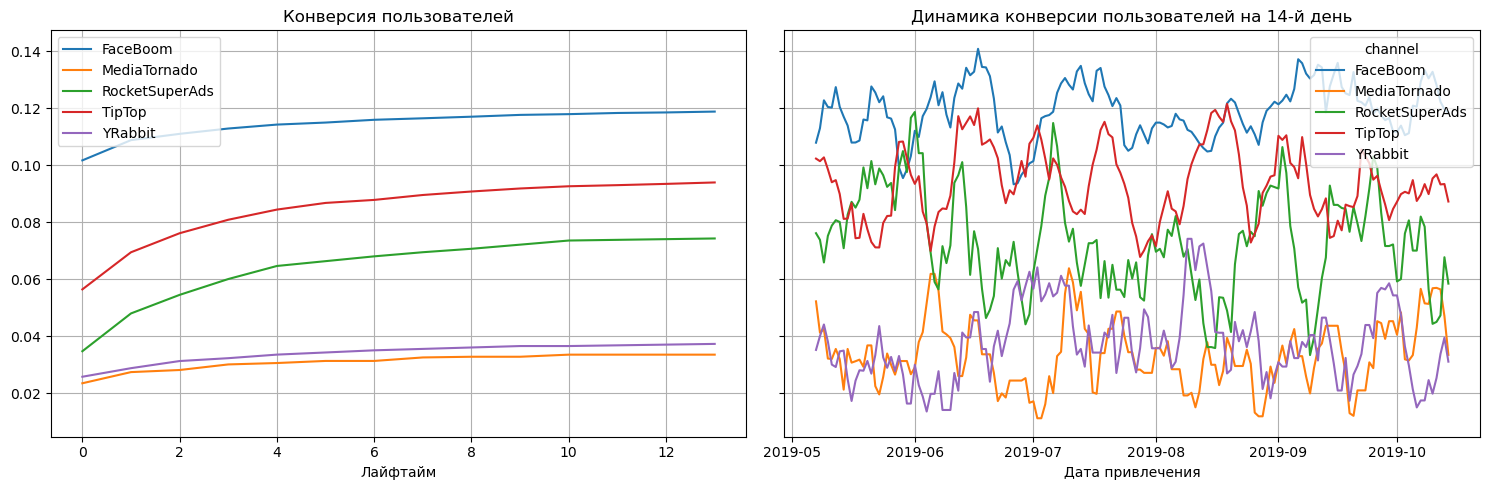

In [84]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

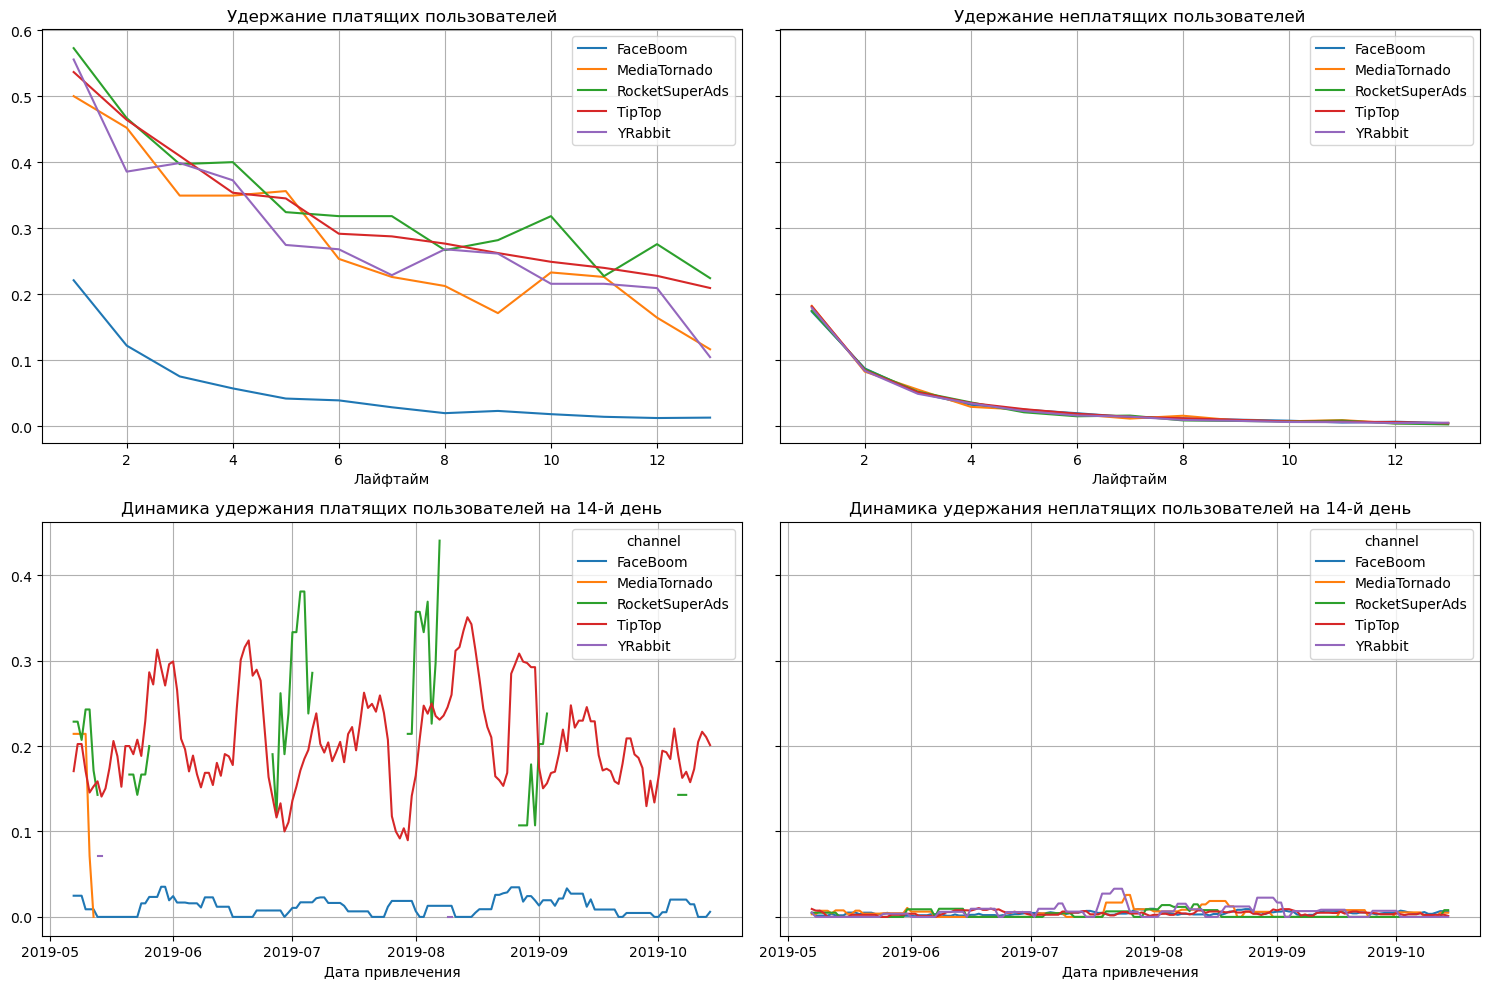

In [85]:
retention_raw, retention_grouped, retention_history = get_retention(
    usa_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Затраты на рекламу в исследуемом периоде росли только у канала TipTop. Вложение бюджета на этот канал сильно повлияло на рост общей стоимости привлечения клиентов из США. У остальных каналов бюджет практически не менялся.

Реклама в TipTop и FaceBoom не окупается. Эффективные каналы - YRabbit (особенно отличная динамика была летом), MediaTornado, RocketSuperAds.

Конверсия в FaceBoom отличная, но удержание хуже всех. Значит, реклама в FaceBoom приносит потенциально платежеспособных клиентов, но они в итоге не удерживаются в приложении и быстро уходят. Этот инструмент можно использовать, но нужно проанализировать контент, который на нем размещался.

**Гипотеза №2 принимается, проблема удержания и высокой стоимости привлечения клиентов из США действительно в каналах продвижения.**

### Промежуточные итоги по разделу

В целом исследование окупаемости рекламы приводит к выводам:

- Реклама не окупается. ROI к концу двухнедельного периода не доходит до линии окупаемости. 

- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

- CAC вырос с мая по октябрь более чем в 2 раза - клиенты для компании обходятся все дороже из месяца в месяц.

- Конверсия имеет стабильный характер, а удержание сильно "хромает" среди неплатящих пользователей

**Как устройства влияют на метрики:** Заметна высокая стоимость привлечения среди клиентов, исполльзующих MAC и IPhone, которая продолжает расти. При этом затраты на рекламу среди этих пользователей не окупаются на протяжении всего двухнедельного периода. Динамика ROI на 14-ый день падает у всех клиентов, но среди клиентов с MAC и IPhone снижение более сильное. Но конверсия для пользователей устройств MAC и IPhone немного выше, чем у других. Удержание для всех устройств примерно одинаковое.

Нужно пересмотреть затраты на привлечение владельцев MAC и IPhone.

**Ситуация по странам:**
Среди всех стран метрики выбиваются сильнее всего у США - реклама там не окупается и имеет тренд к снижению окупаемости в динамике. Стоимость привлечения клиентов из США сильно выше, чем у других стран, и растет в динамике. Конверсия у США высокая, в удержание хуже остальных. После отдельного анализа метрик в США выяснилось, что дело в росте рекламных затрат на дорогой и неэффективный канал TipTop.

У Франции, США и Германии показатели стабильны, ROI выходит на окупаемость со 2-4 дня, стоимость привлечения практически идентична и не меняется во времени.

**Эффективность каналов привлечения:**
Не окупается реклама в каналах TipTop, AdNonSense, FaceBoom. Сильно выбивается стоимость привлечения пользователей в TipTop, затраты на рекламу на этой платформе растут несоразмерно остальным каналам. Кажется в компании было решено вложить бюджет на продвижение в этой платформе, но реклама там неэффективна. Вполне возможно, что дело в самом рекламном контенте (например, реклама обещает что-то нереалистичное, люди интересуются, устанавливают, платят за подписку, но разочаровываются и быстро уходят).

Перспективные каналы по окупаемости: YRabbit, MediaTornado, IamdaMediaAds.

Нужно пересмотреть рекламные стратегии в пользу более эффективных платформ или поменять предлагаемый контент.

## Выводы и рекомендации


На старте мы имели три датасета с данными о пользователях пазвлекательного мобильного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года: посещения, покупки и рекламные расходы на привлечение. Данные чистые, без пропусков и дубликатов. 

**Анализ профилей пользователей:**

- Большинство пользователей приложения приходится на США (более 60%), количество пользователей из Великобритании, Франции, Германии распределилось примерно поровну. Самая большая доля платящих пользователей также приходится на США - около 7%. В Германии, Великобритании и Франции доля платящих варьируется от 3 % до 4%.

- Пользователи чаще пользуются мобильными устройствами, чаще всего это IPhone, на втором месте Android. Примерно поровну пользователей заходит с PC и Mac. Наибольшая доля платящих пользователей у IPhone (около 7%). У остальных устройств доля платящих пользователей составляет 3-4%.

- Всего имеется 11 каналов привлечения. Органически набранная аудитория составляет наибольшую долю. Далее по набору пользователей выделяется FaceBoom и TipTop. Больше всего платящих пользователей пришли через FaceBoom (12%), AdNonSense (11%), lambdaMediaAds (10%). Худшие рекламные каналы по доле платящих пользователей: LeapBob, OppleCreativeMedia, Organic (по 2-3%).

**Затраты на маркетинг и метрики клиентов:**

- Расходы на маркетинг составили 105497 долларов. С начала исследуемого периода затраты на маркетинг постоянно росли до сентября включительно, а в октябре немного снизились. Суммарно в октябре траты вдвое превышают бюджет на май. С начала мая до конца октября затраты на маркетинг выросли почти в 4 раза. При этом на рост затрат влияли только вложения в каналы TipTop и FaceBoom

- Более половины рекламных расходов приходится на TipTop (52%), около трети - на FaceBoom (31%). Остальные каналы суммарно занимают около 17%.

- Реклама не окупается. ROI к концу двухнедельного периода не доходит до линии окупаемости. LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей. CAC вырос с мая по октябрь более чем в 2 раза - клиенты для компании обходятся все дороже из месяца в месяц. Конверсия имеет стабильный характер, а удержание сильно "хромает" среди неплатящих пользователей.

- Конверсия имеет стабильный характер, а удержание среди неплатящих пользователей очень плохое.

- Заметна высокая стоимость привлечения среди клиентов, исполльзующих MAC и IPhone, которая продолжает расти. При хорошей конверсии затраты на рекламу среди этих пользователей не окупаются на протяжении всего двухнедельного периода. Удержание для всех устройств примерно одинаковое.

- Среди всех стран метрики выбиваются сильнее всего у США - реклама там не окупается и имеет тренд к снижению окупаемости в динамике. Удержание американских клиентов также ухудшается, хотя конверсия в США хорошая. У Франции, США и Германии показатели стабильны, ROI выходит на окупаемость со 2-4 дня, стоимость привлечения практически идентична и не меняется во времени.

- Не окупается реклама в каналах TipTop, AdNonSense, FaceBoom. Сильно выбивается стоимость привлечения пользователей в TipTop, затраты на рекламу на этой платформе растут несоразмерно остальным каналам. Перспективные каналы по окупаемости: YRabbit, MediaTornado, IamdaMediaAds.

**Возможные причины неэффективности привлечения пользователей:**

_Первая возможная причина:_ Маркетологи "положили яйца в одну корзину", неравномерно распределенив бюджет на рекламу. Сильно выбивается стоимость привлечения пользователей в TipTop, затраты там растут несоразмерно остальным каналам, но реклама там неэффективна. Скорее всего дело в самом рекламном контенте: например, если реклама обещает что-то нереалистичное, люди интересуются, устанавливают, платят за подписку, но разочаровываются и быстро уходят. Или если реклама привлекает нецелевую аудиторию, которая в итоге отказвается от приложения из-за неподходящих условий.

_Вторая возможная причина:_ Неналаженная стратегия привлечения и удержания центральной аудитории - клиентов из США. Американские пользователи обходятся дорого, не окупаются, плохо удерживаются, хотя имеют хорошие показатели конверсии. Напомним, что более 60% пользователей приложения приходится именно на США, и доля платящих пользователей здесь была больше всех. Возможно, реклама, направленная на США не соотносится с ментальностью, клиентской культурой, либо выбираются каналы, нерелевантные для американской аудитории. 

**Рекомендации для отдела рекламы:**

1. Обратить внимание на пользователей Android и PC. Затраты среди них окупаются, в отличие от пользователей IPhone и Mac, но конвертируются средне.

2. Изучить вопрос привлечения большей аудитории из Европы. Возможно европейская аудитория будет иметь высокий потенциал при грамотном перераспеределении ресурсов на каналы привлечения.  

3. Слишком много средств и надежд было возложено на TipTop. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективные каналы по окупаемости: YRabbit, MediaTornado, IamdaMediaAds. 

4. Отдельные рекомендации по США - здесь однозначно нужно урезать бюджет на неэффективный канал привлечения TipTop. Эффективные каналы - YRabbit (особенно отличная динамика была летом), MediaTornado, RocketSuperAds. Конверсия в FaceBoom отличная, но удержание хуже всех. Значит, реклама в FaceBoom приносит потенциально платежеспособных клиентов, но они в итоге не удерживаются в приложении и быстро уходят. Этот инструмент тоже можно использовать, но нужно проанализировать контент, который на нем размещался.


